In [1]:
# Add ldcpy root to system path
import sys

sys.path.insert(0, '../../../')

# Import ldcpy package
# Autoreloads package everytime the package is called, so changes to code will be reflected in the notebook if the above sys.path.insert(...) line is uncommented.
%load_ext autoreload
%autoreload 2
import ldcpy

# display the plots in this notebook
%matplotlib inline

In [2]:
absorb_col =  ldcpy.open_datasets(
    "cam-fv",["ABSORB"],
    [
        "../../../../test-data/new_absorb/orig.absorb.nc",
        "../../../../test-data/new_absorb/zfp_1e-12.absorb.nc",
        "../../../../test-data/new_absorb/zfp_p12.absorb.nc",
        "../../../../test-data/new_absorb/p12.lon.nc",
        "../../../../test-data/new_absorb/p20.lat.nc",
                "../../../../test-data/new_absorb/p22.lat.nc",
        "../../../../test-data/new_absorb/p24.lat.nc",
                "../../../../test-data/new_absorb/p12.fill.nc",
        "../../../../test-data/new_absorb/p20.fill.nc",
        "../../../../test-data/new_absorb/a10.fill.nc",
        "../../../../test-data/new_absorb/zfp_1e-10.absorb.nc",
        "../../../../test-data/new_absorb/p12.fix.nc",
        "../../../../test-data/new_absorb/p12.ex.nc",

    ],
    ["orig", "zfp_1e-12", "zfp_p12", "lon_p12", "lat_p20", "lat_p22", "lat_p24",
     "fill_p12", "fill_p20", "fill_a10", "zfp_1e-10", "fix_p12", "ex_p12"],)

dataset size in GB 0.87



In [3]:
ab_o = absorb_col.ABSORB.sel(collection="orig").isel(time=9).isel(lev=0).compute()
ab_z = absorb_col.ABSORB.sel(collection="fix_p12").isel(time=9).isel(lev=0).compute()
dm = ldcpy.calcs.Diffcalcs(ab_o, ab_z, aggregate_dims=['lat', 'lon'])
dm_o = ldcpy.calcs.Datasetcalcs(ab_o, aggregate_dims=['lat', 'lon'])
dm_z  = ldcpy.calcs.Datasetcalcs(ab_z, aggregate_dims=['lat', 'lon'])
ssim_fp = dm.get_diff_calc('ssim_fp')
ssim = dm.get_diff_calc('ssim')
m_o = dm_o.get_calc("min_val")
m_z = dm_z.get_calc("min_val")

print(ssim_fp)
print(ssim)
print(m_o.data)
print(m_z.data)

0.9905810624818054
0.9993520029598025
3.1158388179687926e-14
3.111400026512001e-14


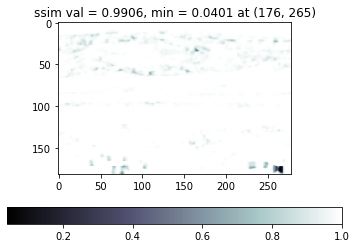

In [461]:
b2_orig = dm.plot_ssim_mat(ssim_type = "ssim_fp", return_mat = True)

In [459]:
b = b2_orig[0]
#print(b.shape)
np.nanmean(b)
ind = np.where(b < 1.0)
b.size

           

50596

In [413]:
b[188, 135:142]

array([0.35971509, 0.40578806, 0.52012499, 0.50410234, 0.32467359,
       0.21205127, 0.18192685])

In [444]:
ab_o[186, 141].data

array(3.7024293e-13, dtype=float32)

In [445]:
ab_z[186, 141].data

array(3.7014836e-13, dtype=float32)

In [405]:
ab_z.shape

(192, 288)

In [399]:
ind = np.where(abs(ab_z) > 1e7)

In [426]:
ab_o[188,:]

<xarray.DataArray 'ABSORB' (lon: 288)>
array([          nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
...
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan],
      dtype=float32)
Coordinates:
    lat         float64 87.17
    lev         float64 3.643
  * lon         (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
    time        object 2006-11-01 00:00:00
    cell_area   (lon) float64 0.0008113 0.0008113 ... 0.0008113 0.0008113
    collection  <U9 'orig'
Attributes:
    mdims:         1
    units:         /m
    long_name:     Aerosol absorption
    cell_methods:  time: mean

In [400]:
ind

(array([188, 188, 188]), array([135, 140, 141]))

In [356]:
ab0 = absorb_col.isel(time=9)
ldcpy.compare_stats(ab0, "ABSORB", ["orig", "zfp_1e-10", "zfp_p12", "fill_p12" , "fill_a10", "fix_p12", "ex_p12"])

orig   zfp_1e-10      zfp_p12    fill_p12  \
mean                  3.8794e-07  3.8794e-07  -3.5957e+28  3.8795e-07   
variance              6.6636e-12  6.6636e-12   2.7226e+61  6.6653e-12   
standard deviation    2.5814e-06  2.5814e-06   5.2178e+30  2.5817e-06   
min value             3.1158e-14           0  -9.7356e+32  3.1114e-14   
max value             0.00057614  0.00057614    0.0005765   0.0005765   
probability positive           1      0.9561      0.99994           1   
number of zeros                0       71318            0           0   

                        fill_a10     fix_p12      ex_p12  
mean                  3.8794e-07  3.8795e-07  3.8795e-07  
variance              6.6636e-12  6.6653e-12  6.6653e-12  
standard deviation    2.5814e-06  2.5817e-06  2.5817e-06  
min value                      0  3.1114e-14  3.1114e-14  
max value             0.00057614   0.0005765   0.0005765  
probability positive     0.95615           1           1  
number of zeros            71234           0           0

zfp_1e-10     zfp_p12    fill_p12  \
max abs diff                        6.8241e-08  9.7356e+32  1.1414e-06   
min abs diff                                 0           0           0   
mean abs diff                        1.295e-11  3.5957e+28  3.2719e-10   
mean squared diff                   1.0282e-24  1.2929e+57  2.2919e-23   
root mean squared diff              1.6272e-10   5.218e+30   2.981e-09   
normalized root mean squared diff   2.8242e-07  9.0567e+33   5.174e-06   
normalized max pointwise error      0.00011844  1.6898e+36  0.00058865   
pearson correlation coefficient              1  0.00099817           1   
ks p-value                                   0     0.99883     0.99981   
spatial relative error(% > 0.0001)      77.523      90.864      90.864   
max spatial relative error                   1  2.7414e+45      0.1401   
Data SSIM                             0.011988     0.99866     0.98497   

                                      fill_a10     fix_p12      ex_p12  
max abs diff                        5.3483e-11  1.1414e-06  1.1414e-06  
min abs diff                                 0           0           0  
mean abs diff                       1.2174e-11  3.2719e-10  3.2719e-10  
mean squared diff                   5.5947e-26  2.2919e-23  2.2916e-23  
root mean squared diff              1.5251e-11   2.981e-09   2.981e-09  
normalized root mean squared diff   2.6472e-08   5.174e-06   5.174e-06  
normalized max pointwise error      9.2829e-08  0.00058865  0.00058865  
pearson correlation coefficient              1           1           1  
ks p-value                                   0     0.99981     0.99981  
spatial relative error(% > 0.0001)      77.522      90.864      90.864  
max spatial relative error                   1      0.1401      0.1401  
Data SSIM                             0.011988     0.98497     0.98497

/Users/abaker/anaconda3/envs/ldcpy_dev/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/Users/abaker/anaconda3/envs/ldcpy_dev/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(


 SSIM 1 & 2 =  0.89865



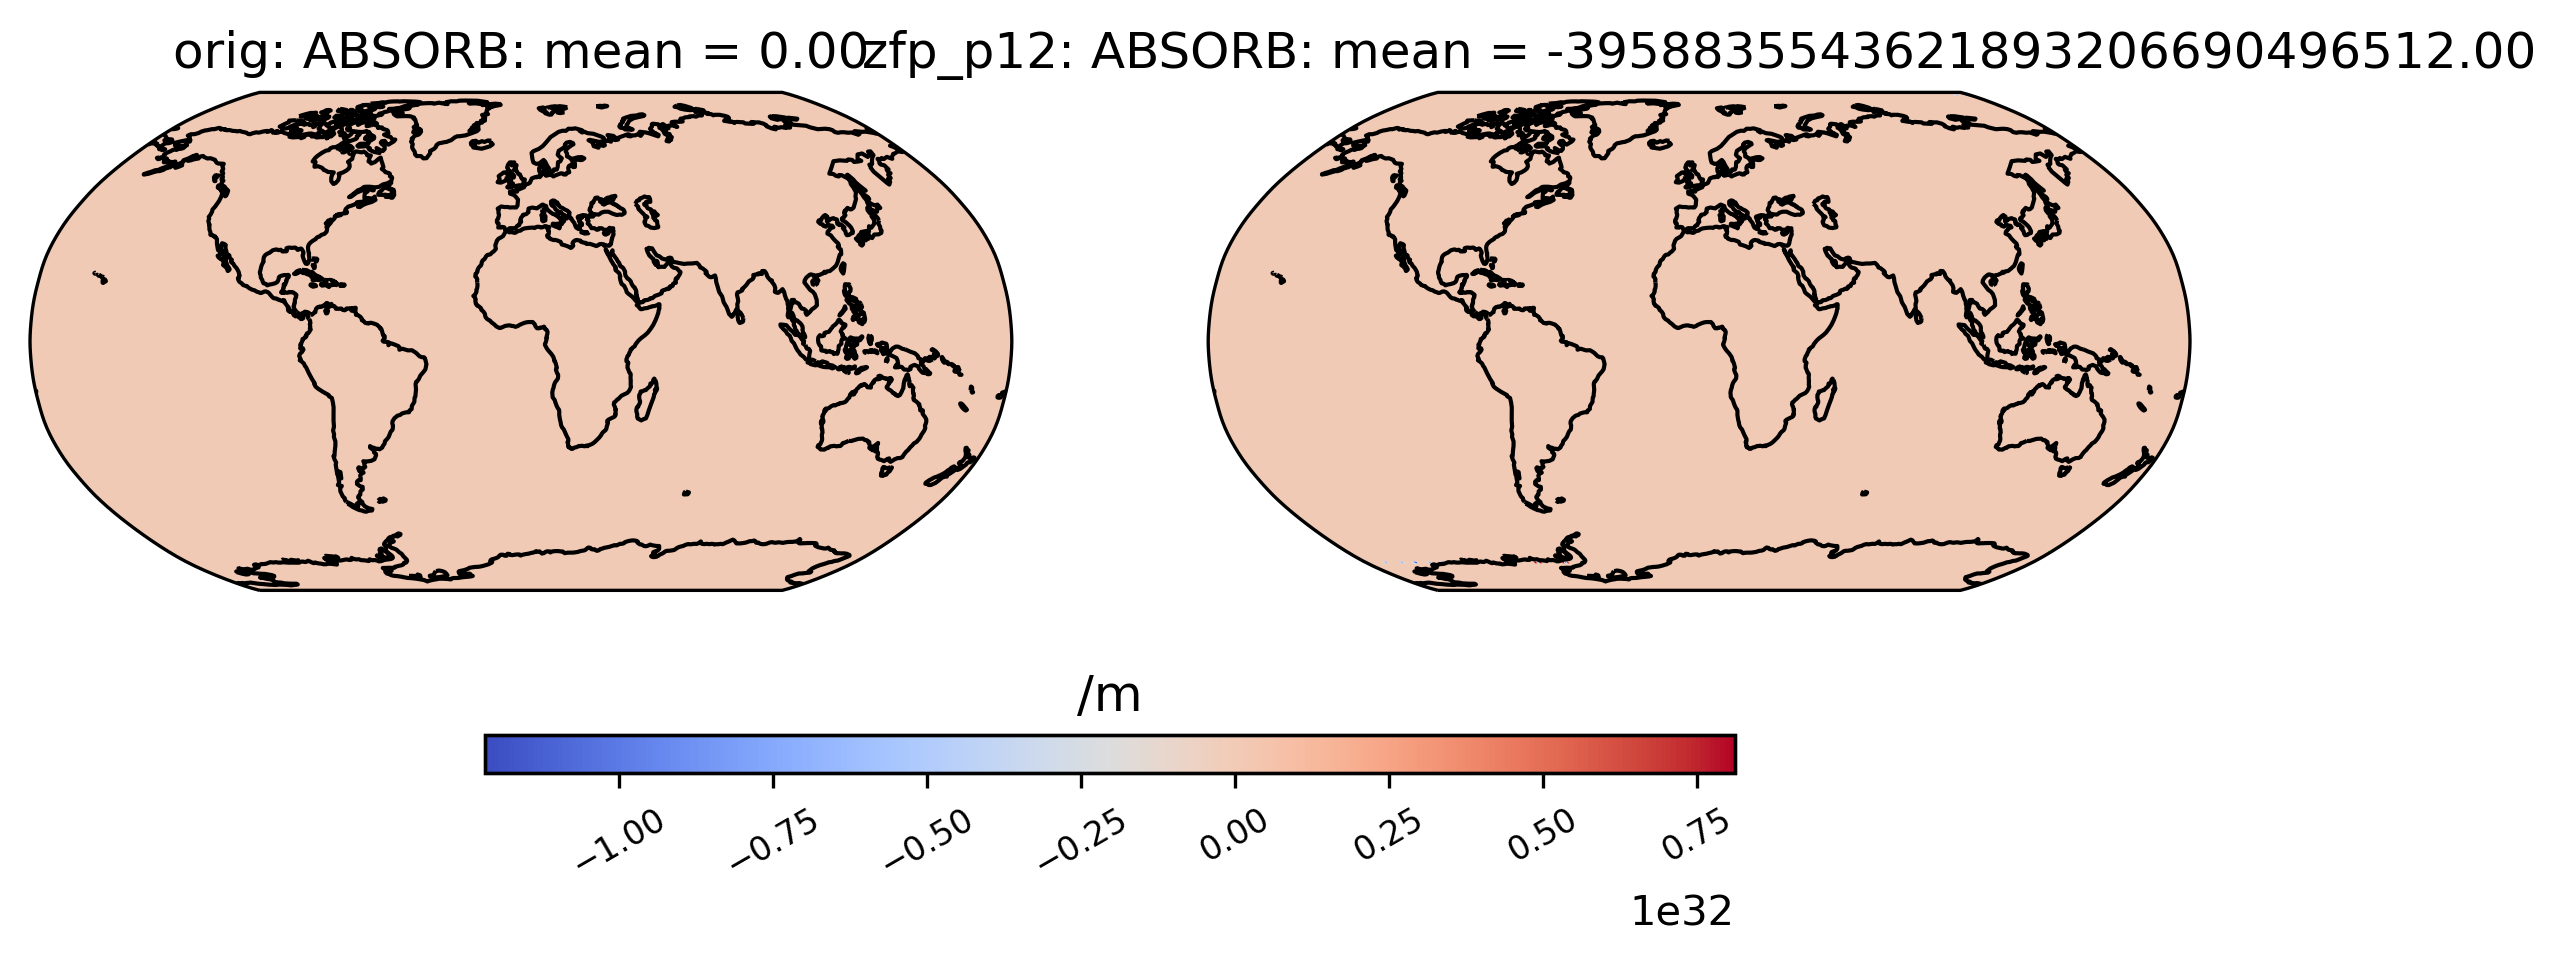

In [362]:
ldcpy.plot(
    absorb_col,
    "ABSORB",
    sets=["orig", "zfp_p12"],
    calc="mean", calc_ssim = True, lev = 0
)

In [267]:
 1658880-1494720
    

164160

In [5]:
AB_o = absorb_col["ABSORB"].sel(collection="orig").isel(time=9).compute()
AB_a = absorb_col["ABSORB"].sel(collection="zfp_1e-12").isel(time=9).compute()
AB_p12 = absorb_col["ABSORB"].sel(collection="zfp_p12").isel(time=9).compute()
AB_p12_lon= absorb_col["ABSORB"].sel(collection="lon_p12").isel(time=9).compute()
AB_p20 = absorb_col["ABSORB"].sel(collection="lat_p20").isel(time=9).compute()
AB_p22 = absorb_col["ABSORB"].sel(collection="lat_p22").isel(time=9).compute()
AB_p24 = absorb_col["ABSORB"].sel(collection="lat_p24").isel(time=9).compute()
AB_p12_fill = absorb_col["ABSORB"].sel(collection="fill_p12").isel(time=9).compute()
AB_p20_fill = absorb_col["ABSORB"].sel(collection="fill_p20").isel(time=9).compute()


In [92]:
import numpy as np
print(np.count_nonzero(~np.isnan(AB_a)))
print(np.count_nonzero(~np.isnan(AB_p)))


1624530
1624530
1624530


In [222]:
AB_p12_fill.mean(skipna=True)


<xarray.DataArray 'ABSORB' ()>
array(3.8794843e-07, dtype=float32)
Coordinates:
    time        object 2006-11-01 00:00:00
    collection  <U9 'fill_p12'
Attributes:
    mdims:         1
    units:         /m
    long_name:     Aerosol absorption
    cell_methods:  time: mean

In [97]:
AB_p.mean(skipna=True)

<xarray.DataArray 'ABSORB' ()>
array(-3.5957071e+28, dtype=float32)
Coordinates:
    time        object 2006-11-01 00:00:00
    collection  <U9 'zfp_p12'
Attributes:
    mdims:         1
    units:         /m
    long_name:     Aerosol absorption
    cell_methods:  time: mean

In [ ]:
for j in range(192):
    print(j)
    print(AB_p.isel(lev=0)[j,:].mean().data)

In [212]:
j = 188
print(AB_o.isel(lev=0)[j,135:142].data)
print(AB_p.isel(lev=0)[j,135:142].data)
print(AB_a.isel(lev=0)[j,135:142].data)
print(AB_pl.isel(lev=0)[j,135:142].data)
print(AB_p20.isel(lev=0)[j,135:142].data)
print(AB_p22.isel(lev=0)[j,135:142].data)
print(AB_p24.isel(lev=0)[j,135:142].data)


[3.5712020e-13 3.5665318e-13 3.5624525e-13 3.5589942e-13 3.5560370e-13
 3.5534734e-13 3.5512443e-13]
[-6.4903711e+32  3.5682568e-13  3.5638159e-13  3.5593750e-13
  3.5549341e-13 -3.2451855e+32 -9.7355566e+32]
[0.0000000e+00 4.5474735e-13 4.5474735e-13 4.5474735e-13 4.5474735e-13
 0.0000000e+00 0.0000000e+00]
[-6.4903711e+32  3.5682568e-13  3.5638159e-13  3.5593750e-13
  3.5549341e-13 -3.2451855e+32 -9.7355566e+32]
[-5.0706024e+30  3.5665438e-13  3.5624585e-13  3.5589977e-13
  3.5560227e-13  0.0000000e+00  0.0000000e+00]
[ 6.3382530e+29  3.5665340e-13  3.5624552e-13  3.5589923e-13
  3.5560411e-13 -9.5073795e+29 -3.1691265e+29]
[1.5845633e+29 3.5665313e-13 3.5624514e-13 3.5589939e-13 3.5560373e-13
 2.3768449e+29 7.9228163e+28]


In [24]:
from scipy import interpolate
import numpy as np
d = AB_o.isel(lev=0).interpolate_na('lat', method='linear', fill_value='extrapolate')
dl = AB_o.isel(lev=0).interpolate_na('lon', method='linear', fill_value=0)
a = AB_o.isel(lev=0)
f = AB_o.isel(lev=0).fillna(0)
ff = AB_o.isel(lev=0).ffill('lat')
if np.count_nonzero(np.isnan(dl)):
    dl = dl.fillna(0)
else:
    ddd =dl

In [25]:
print("interp-lat", np.count_nonzero(np.isnan(d)))
print("interp-lon", np.count_nonzero(np.isnan(dl)))
print("orig = ", np.count_nonzero(np.isnan(a)))
print(" fill 0 = ", np.count_nonzero(np.isnan(f)))
print(" ffill= ", np.count_nonzero(np.isnan(ff)))
print(" ddd= ", np.count_nonzero(np.isnan(ddd)))


interp-lat 0
interp-lon 0
orig =  1145
 fill 0 =  0
 ffill=  0
 ddd=  0


In [10]:
AB_o_0 = absorb_col["ABSORB"].sel(collection="orig").isel(time=0).compute()

a0 = AB_o_0.isel(lev=0)
d0 = a0.interpolate_na(dim='lat', fill_value = 'extrapolate')
f0 = a0.fillna(0)
print("interp-lat", np.count_nonzero(np.isnan(d0)))
print("orig = ", np.count_nonzero(np.isnan(a0)))
print(" fill 0 = ", np.count_nonzero(np.isnan(f0)))

interp-lat 0
orig =  5472
 fill 0 =  0


In [353]:
tester = a_0[0:100, :].copy()
print(np.count_nonzero(np.isnan(tester)))
tester[5,5] = np.nan
print(np.count_nonzero(np.isnan(tester)))


0
1


In [283]:
t = tester.interpolate_na(dim='lat')
tt = tester.fillna(0)
print(np.count_nonzero(np.isnan(t)))
print(np.count_nonzero(np.isnan(tt)))


0
0


In [ ]:
ldcpy.CompChecker()

In [318]:
ts_col =  ldcpy.open_datasets(
    ["TS"],
    [
        "../../../data/cam-fv/orig.TS.100days.nc",
        "../../../data/cam-fv/zfp1.0.TS.100days.nc",
        "../../../data/cam-fv/zfp1e-1.TS.100days.nc",
    ],
    ["orig", "zfpA1.0", "zfpA1e-1"],)

cam_prect = ldcpy.open_datasets(["PRECT"],
    ["../../../data/cam-fv/orig.PRECT.60days.nc",
     "../../../data/cam-fv/zfp1e-7.PRECT.60days.nc",
    "../../../data/cam-fv/zfp1e-9.PRECT.60days.nc",
     "../../../data/cam-fv/zfp1e-11.PRECT.60days.nc"],
     [ "orig","zfp1e-7", "zfp1e-9", "zfp1e-11"],)

pop_sst = ldcpy.open_datasets(
    ["SST"],
    ['../../../data/pop/pop.SST.60days.nc', '../../../data/pop/zfp1e-2.pop.SST.60days.nc'],
    ['orig', 'zfp'],
)
t_col = ldcpy.open_datasets(
    ["T"],
    [
        "../../../data/cam-fv/cam-fv.T.3months.nc",
        "../../../data/cam-fv/c.fpzip.cam-fv.T.3months.nc",
    ],
    ["orig", "comp"],
    chunks={"time": 1},
)
cloud_col = ldcpy.open_datasets(
    ["CLOUD"],
    [
        "../../../data/cam-fv/cam-fv.CLOUD.3months.nc",
        "../../../data/cam-fv/c.fpzip.cam-fv.CLOUD.3months.nc",
    ],
    ["orig", "fpzip"],
    chunks={"time": 1},
)
cmfmc = ldcpy.open_datasets(["CMFMC"], ["/Users/abaker/alli/code-repo/test-data/CMFMC.test.nc", 
                                       "/Users/abaker/alli/code-repo/test-data/CMFMC.zfp.p18.test.nc"],
                              ["orig", "lossy"], chunks={"time":1})
precsc = ldcpy.open_datasets(["PRECSC"], ["/Users/abaker/alli/code-repo/test-data/orig_precsc.nc", 
                                       "/Users/abaker/alli/code-repo/test-data/p10_precsc.nc"],
                              ["orig", "zfp"], chunks={"time":1})

dataset size in GB 0.07

dataset size in GB 0.05

dataset size in GB 0.06

dataset size in GB 0.04

dataset size in GB 0.04

dataset size in GB 3.77

dataset size in GB 0.00



In [524]:
sst_orig = pop_sst["SST"].sel(collection="orig").isel(time=0).compute()
sst_comp = pop_sst["SST"].sel(collection="zfp").isel(time=0).compute()
sst_differ = ldcpy.calcs.Diffcalcs(sst_orig, sst_comp)

In [180]:
%%time
sst_sfp = sst_differ.get_diff_calc('ssim_fp')

CPU times: user 145 ms, sys: 8.34 ms, total: 153 ms
Wall time: 153 ms


In [181]:
%%time
sst_sfp_f = sst_differ.get_diff_calc('ssim_fp_orig')


CPU times: user 9.67 s, sys: 95.4 ms, total: 9.77 s
Wall time: 10.4 s


In [182]:
print('ssim_fp = ', sst_sfp)
print('ssim_fp_fast = ', sst_sfp_f)



ssim_fp =  0.9976406615995858
ssim_fp_fast =  0.9976037038347015


In [11]:
a = sst_differ._ssim_mat
a

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [ 1.,  1.,  1., ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [525]:
t_orig = t_col["T"].sel(collection="orig").isel(time=0).compute()
t_comp = t_col["T"].sel(collection="comp").isel(time=0).compute()
t_differ = ldcpy.calcs.Diffcalcs(t_orig, t_comp)

In [526]:
%%time
sfp = t_differ.get_diff_calc('ssim_fp')
sfp

CPU times: user 984 ms, sys: 11 ms, total: 995 ms
Wall time: 994 ms


0.8880922728873855

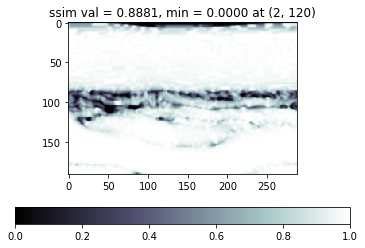

In [527]:
b = t_differ.plot_ssim_mat(return_mat = True)

float64
float64
float64
float64
a1_mu =  0.6259752849141319
a2_mu =  0.6258137004670481
a1_std_sq =  6.193340714166773e-06
a2_std_sq =  5.47604374251387e-06
a1a2_cov =  5.530914745977e-06
float64
float64
float64
float64
a1_mu =  0.683545935570737
a2_mu =  0.6828393086855089
a1_std_sq =  6.043354096824105e-05
a2_std_sq =  6.467023750189593e-05
a1a2_cov =  6.141600710030115e-05
float64
float64
float64
float64
a1_mu =  0.67512096751013
a2_mu =  0.6746827073846502
a1_std_sq =  2.023199023037936e-06
a2_std_sq =  6.783145824473813e-07
a1a2_cov =  5.874591921806172e-07
float64
float64
float64
float64
a1_mu =  0.6097878219000284
a2_mu =  0.607843137254902
a1_std_sq =  3.84441592549134e-06
a2_std_sq =  -1.1102230246251565e-16
a1a2_cov =  -1.6653345369377348e-16
float64
float64
float64
float64
a1_mu =  0.46192193093196054
a2_mu =  0.4617847882122914
a1_std_sq =  3.2957696719237983e-06
a2_std_sq =  2.87394463069357e-06
a1a2_cov =  2.825353920626883e-06
float64
float64
float64
float64
a1_mu =  0.2

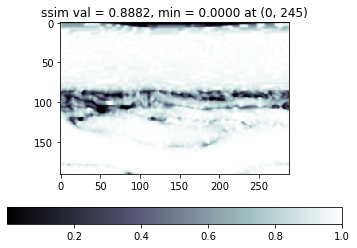

In [528]:
b_orig = t_differ.plot_ssim_mat(ssim_type = "ssim_fp_orig", return_mat = True)

In [529]:
for i in range(len(b)):
    print(b[i].mean())
print('--------')
for i in range(len(b_orig)):
    print(b_orig[i].mean())

0.9293483803734117
0.9325605197459862
0.9096050086644218
0.8880922728873855
0.9208837833898365
0.9501430973496743
0.9565240717054208
0.961767748928515
0.9525343095329896
0.9623102115473722
0.9475739824371758
0.9568922046763462
0.9708576415845358
0.9751592421432091
0.974222981486196
0.9636585020266296
0.9631891553143205
0.9537633191308215
0.9560743515376352
0.9598788768656907
0.9536313534377787
0.9599990451562408
0.96476236386071
0.9685354496218475
0.9717420211567279
0.9770118937319018
0.9799081488442662
0.9812577769469678
0.9726080927805165
0.9753483223320251
--------
0.929348379724653
0.932560518848959
0.9096050278738711
0.8881766110489395
0.9208837834454491
0.9501430973448528
0.9565240716712462
0.9617677489135329
0.9526397317232159
0.9623102115521461
0.9475739757444737
0.9568922046563707
0.970857641584776
0.9751592421432583
0.9742229814860003
0.9636585020258797
0.9631891553144146
0.9537633191320621
0.9560743515344191
0.9598788768648339
0.9536313534547222
0.9599990451522855
0.96476236

In [530]:
bmin = b[3]
bmin_orig = b_orig[3]
print (len(b))
print(len(b_orig))
print(bmin.shape)
print(bmin_orig.shape)


30
30
(192, 288)
(192, 288)


In [531]:
print(bmin[110,53])
print(bmin_orig[110,53])

2.8899490996076187e-10
1.7348010804254085e-10


In [532]:
t3_orig = t_col["T"].sel(collection="orig").isel(time=0).isel(lev=3).compute().data
t3_comp = t_col["T"].sel(collection="comp").isel(time=0).isel(lev=3).compute().data

In [533]:
ind = (110,53)
co = t3_orig[ind]
cc = t3_comp[ind]
print(co)
print(cc)

216.94673
216.9375


In [534]:
from skimage.util import crop
c_mat = crop(bmin_orig, 5)
c_mat.min()

1.7348010804254085e-10

In [535]:
t3_comp[105:116,48:59]

array([[216.8125, 216.8125, 216.8125, 216.8125, 216.8125, 216.75  ,
        216.75  , 216.75  , 216.8125, 216.8125, 216.8125],
       [216.8125, 216.8125, 216.8125, 216.8125, 216.8125, 216.8125,
        216.8125, 216.75  , 216.8125, 216.8125, 216.8125],
       [216.875 , 216.875 , 216.875 , 216.8125, 216.8125, 216.8125,
        216.8125, 216.8125, 216.8125, 216.8125, 216.875 ],
       [216.875 , 216.875 , 216.875 , 216.875 , 216.875 , 216.875 ,
        216.875 , 216.8125, 216.875 , 216.875 , 216.875 ],
       [216.875 , 216.875 , 216.875 , 216.875 , 216.875 , 216.875 ,
        216.875 , 216.875 , 216.875 , 216.875 , 216.875 ],
       [216.9375, 216.9375, 216.9375, 216.9375, 216.9375, 216.9375,
        216.9375, 216.9375, 216.9375, 216.9375, 216.9375],
       [216.9375, 216.9375, 216.9375, 216.9375, 216.9375, 216.9375,
        216.9375, 216.9375, 216.9375, 216.9375, 216.9375],
       [216.875 , 216.875 , 216.875 , 216.875 , 216.875 , 216.875 ,
        216.875 , 216.9375, 216.9375, 216.9

In [337]:
t3_orig[105:116,48:59]

array([[216.85332, 216.84158, 216.8346 , 216.8236 , 216.81425, 216.80347,
        216.79555, 216.79645, 216.81378, 216.83649, 216.86209],
       [216.87415, 216.86658, 216.85912, 216.84816, 216.83725, 216.82307,
        216.81267, 216.8086 , 216.81927, 216.84192, 216.86725],
       [216.88953, 216.88641, 216.87788, 216.87105, 216.86357, 216.85324,
        216.84134, 216.8368 , 216.84042, 216.8579 , 216.87723],
       [216.91098, 216.90515, 216.90025, 216.89554, 216.8927 , 216.88876,
        216.87909, 216.87431, 216.87605, 216.88692, 216.9035 ],
       [216.93663, 216.92984, 216.92532, 216.922  , 216.92058, 216.92094,
        216.9202 , 216.91722, 216.91766, 216.92442, 216.93552],
       [216.95941, 216.95256, 216.9486 , 216.94437, 216.944  , 216.94673,
        216.95012, 216.95255, 216.95412, 216.96005, 216.96791],
       [216.95074, 216.94823, 216.94743, 216.9466 , 216.9467 , 216.95116,
        216.95767, 216.9658 , 216.972  , 216.97853, 216.98611],
       [216.91046, 216.90907, 216.

In [338]:
np.linalg.norm(t3_comp[105:116, 48:59] - t3_orig[105:116, 48:59])

0.39149624

In [452]:
a1 = t3_orig
a2 = t3_comp
a1 = a1.astype('float64')
a2 = a2.astype('float64')

In [453]:
smin = min(np.nanmin(a1), np.nanmin(a2))
smax = max(np.nanmax(a1), np.nanmax(a2))
r = smax - smin

In [454]:
print(smin, smax, r)
sc_a1 = (a1 - smin) / r
sc_a2 = (a2 - smin) / r
sc_a1 = np.round(sc_a1 * 255) / 255
sc_a2 = np.round(sc_a2 * 255) / 255

182.875 238.73638916015625 55.86138916015625


In [455]:
my_eps = 1.0e-15
from math import exp, pi, sqrt

sigma = 1.5
n=11
k=5
def oned_gauss(n, sigma):
        r = range(-int(n / 2), int(n / 2) + 1)
        return [(1 / (sigma * sqrt(2 * pi))) * exp(-float(x) ** 2 / (2 * sigma ** 2)) for x in r]
g_w = np.array(oned_gauss(n, sigma))
gg_w = np.outer(g_w, g_w)
print(gg_w.dtype)

float64


In [503]:
a1_win = sc_a1[105:116, 48:59]
a2_win = sc_a2[105:116, 48:59]

#print(a1_win.dtype)
#print(a2_win.dtype)
#print(gg_w.dtype)

Wt = gg_w
indices1 = ~np.isnan(a1_win)
indices2 = ~np.isnan(a2_win)
a1_mu = np.average(a1_win[indices1], weights=Wt[indices1])
a2_mu = np.average(a2_win[indices2], weights=Wt[indices2])
a1_std_sq = (
                            np.average((a1_win[indices1] * a1_win[indices1]), weights=Wt[indices1])
                            - a1_mu * a1_mu
                        )
a2_std_sq = (
                            np.average((a2_win[indices2] * a2_win[indices2]), weights=Wt[indices2])
                            - a2_mu * a2_mu
                        )
a1a2_cov = (
                            np.average(
                                (a1_win[indices1] * a2_win[indices2]),
                                weights=Wt[indices1],
                            )
                            - a1_mu * a2_mu
                        )

#a1_std_sq_orig = np.average((a1_win[indices1] - a1_mu) ** 2, weights=Wt[indices1])
#a2_std_sq_orig = np.average((a2_win[indices2] - a2_mu) ** 2, weights=Wt[indices2])
#a1a2_cov_orig = np.average((a1_win[indices1] - a1_mu) * (a2_win[indices2] - a2_mu), weights=Wt[indices1])

In [504]:
print("a1_mu = ", a1_mu)
print("a2_mu = ", a2_mu)
print("a1_std_sq = ", a1_std_sq)
print("a2_std_sq = ", a2_std_sq)
print("a1a2_cov = ", a1a2_cov)
#print("a1_std_sq_orig = ", a1_std_sq_orig)
#print("a2_std_sq_orig = ", a2_std_sq_orig)
#print("a1a2_cov_orig = ", a1a2_cov_orig)


a1_mu =  0.6097878219000284
a2_mu =  0.607843137254902
a1_std_sq =  3.84441592549134e-06
a2_std_sq =  -1.1102230246251565e-16
a1a2_cov =  -1.6653345369377348e-16


In [495]:
my_eps

1e-15

In [536]:
C1 = C2 = my_eps
ssim_t1 = 2 * a1_mu * a2_mu + C1
ssim_b1 = a1_mu * a1_mu + a2_mu * a2_mu + C1
ssim_t2 = 2 * a1a2_cov + C2
ssim_b2 = a1_std_sq + a2_std_sq + C2
print("ssim_t1 = ", ssim_t1)
print("ssim_b1 = ", ssim_b1)
print("ssim_t2 = ", ssim_t2)
print("ssim_b2 = ", ssim_b2)

ssim_t1 =  0.7413106854470944
ssim_b1 =  0.7413144672454635
ssim_t2 =  6.669330926124531e-16
ssim_b2 =  3.844415926380318e-06


In [497]:
ssim_1 = ssim_t1 / ssim_b1
ssim_2 = ssim_t2 / ssim_b2
print("ssim_1 = ", ssim_1)
print("ssim_2 = ", ssim_2)
s = ssim_1 * ssim_2
print("s = ", s)

ssim_1 =  0.9999948985234525
ssim_2 =  1.7348099305175835e-10
s =  1.7348010804254085e-10


In [492]:
np.linalg.norm(t3_comp[105:116, 48:59] - t3_orig[105:116, 48:59])


0.9630899398429144

In [507]:
np.linalg.norm(t3_comp[5:16, 48:59] - t3_orig[5:16, 48:59])

0.40120426

In [514]:
d1 = abs(t3_comp[5:16, 48:59] - t3_orig[5:16, 48:59])

In [515]:
d2 = abs(t3_comp[105:116, 48:59] - t3_orig[105:116, 48:59])

In [516]:
d1.max()

0.06222534

In [517]:
d2.max()

0.06236267

In [519]:
t3_comp[110,53]

216.9375

In [520]:
t3_orig[110,53]

216.94673

In [521]:
t3_comp[5,53]

238.375

In [522]:
t3_orig[5,53]

238.42128

In [444]:
t3_o = t_col["T"].sel(collection="orig").isel(time=0).isel(lev=3).compute()
t3_c = t_col["T"].sel(collection="comp").isel(time=0).isel(lev=3).compute()
differ = ldcpy.calcs.Diffcalcs(t3_o, t3_c)

float64
float64
float64
float64
a1_mu =  0.6097878219000284
a2_mu =  0.607843137254902
a1_std_sq =  3.84441592549134e-06
a2_std_sq =  -1.1102230246251565e-16
a1a2_cov =  -1.6653345369377348e-16
0.8881766110489395
CPU times: user 6.85 s, sys: 91.1 ms, total: 6.94 s
Wall time: 7.24 s


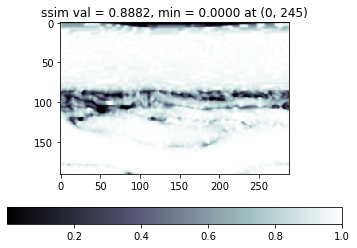

In [445]:
%%time
sfp = differ.get_diff_calc('ssim_fp_orig')
print(sfp)
bb = differ.plot_ssim_mat(ssim_type = 'ssim_fp_orig', return_mat=True)
bb = bb[0]


In [446]:
bb[110,53]

1.7348010804254085e-10

In [447]:
ts_orig = ts_col["TS"].sel(collection="orig").isel(time=0).compute()
ts_comp = ts_col["TS"].sel(collection="zfpA1.0").isel(time=0).compute()
differ = ldcpy.calcs.Diffcalcs(ts_orig, ts_comp)

In [448]:
%%time
sfp = differ.get_diff_calc('ssim_fp_orig')
print(sfp)

float64
float64
float64
float64
a1_mu =  0.8294103882032253
a2_mu =  0.8292609012869412
a1_std_sq =  3.802769333405287e-05
a2_std_sq =  4.1511399732852006e-05
a1a2_cov =  3.912196545252655e-05
0.9822025209368086
CPU times: user 7.21 s, sys: 115 ms, total: 7.33 s
Wall time: 7.76 s


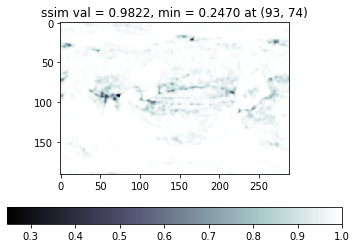

In [449]:
bb = differ.plot_ssim_mat(ssim_type = 'ssim_fp_orig', return_mat=True)
bb = bb[0]


In [450]:
bb[105,53]

0.9638375133904771

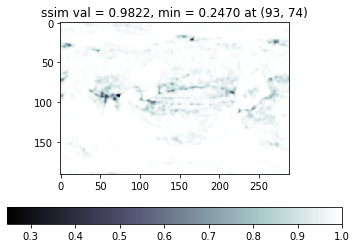

In [451]:
differ.plot_ssim_mat()

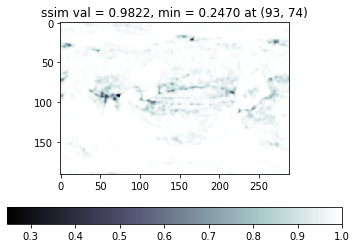

In [384]:
b = differ.plot_ssim_mat(return_mat = True)

In [193]:
len(b)

1

In [137]:
mats = []


In [142]:
mats.append(b)

In [148]:
len(mats)

2

In [158]:
num = len(mats)    
meana = np.zeros(num)
for i in range(num):
    meana[i] = np.nanmean(mats[i])
        

In [174]:
min_meana = meana.min()
min_lev = meana.argmin()
min_lev_val = np.min(mats[min_lev])
        
ind = np.unravel_index(np.argmin(mats[min_lev], axis=None), mats[min_lev].shape)


In [175]:
min_lev_val

0.24703531062145037

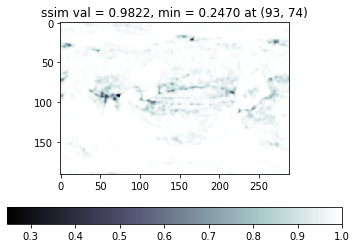

In [178]:
plt.imshow(mats[min_lev], interpolation='none', vmax=1.0, cmap='bone')
plt.colorbar(orientation='horizontal')
mytitle = f'ssim val = {min_meana:.4f}, min = {min_lev_val:.4f} at {ind}'
plt.title(mytitle)
plt.show()

In [98]:
import numpy as np
ind = np.unravel_index(np.argmin(a, axis=None), a.shape)

In [27]:
a[ind]

0.24703531062145037

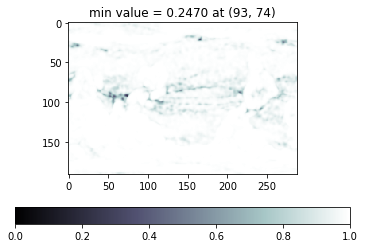

In [60]:
import matplotlib.pyplot as plt
plt.imshow(a, interpolation='none', vmax = 1.0, vmin= 0.0, cmap='bone')
plt.colorbar(orientation= 'horizontal')
mytitle = f'min value = {mina:.4f} at {ind}'
plt.title(mytitle)
plt.show()

In [556]:
from astropy.convolution import Gaussian2DKernel, interpolate_replace_nans, convolve, convolve_fft
import matplotlib.pyplot as plt
import numpy as np
from skimage.util import crop
k=5
mytest = np.ones([20,20])
#mytest = np.random.rand(20,30)
kernel = Gaussian2DKernel(x_stddev = 1.5, x_size=11, y_size=11)
#filter_args = {'boundary' : 'fill', 'preserve_nan' : True}
#filter_args = {'preserve_nan' : True}
filter_args = {'boundary' : 'extend', 'preserve_nan' : True}

c_new = convolve(mytest, kernel, **filter_args)


In [557]:
c_new[5:15, 5:15]

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [559]:
c_new[1,:]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

In [540]:
from astropy.convolution import Gaussian2DKernel, interpolate_replace_nans, convolve, convolve_fft
import matplotlib.pyplot as plt
import numpy as np
from skimage.util import crop
k=5
mytest = np.ones([20,20])
#mytest = np.random.rand(20,30)
kernel = Gaussian2DKernel(x_stddev = 1.5, x_size=11, y_size=11)
filter_args = {'boundary' : 'fill', 'preserve_nan' : True}
c_new = convolve(mytest, kernel, **filter_args)
cc_new = crop(c_new, k)

#fix border regions
k_sum = kernel.array.sum()
X = mytest.shape[0]
Y = mytest.shape[1]
c_orig = c_new   
#R and L rectangles and T and B rectangles 
for j in range(k):
    kk = kernel.array[:,0:k+j+1].sum()        
    scale = k_sum/kk
    # L and R
    c_new[k:X-k,j]  = c_new[k:X-k,j]*scale
    c_new[k:X-k,Y-j-1] = c_new[k:X-k,Y-j-1]*scale
    #T and B
    c_new[j, k:Y-k]  = c_new[j, k:Y-k]*scale
    c_new[X-j-1,k:Y-k] = c_new[X-j-1, k:Y-k]*scale

#corners
for i in range(k):
   for j in range(k):
        kk = kernel.array[0:k+i+1,0:k+j+1].sum()
        scale = k_sum/kk
        #top left
        c_new[i,j]  = c_new[i,j]*scale
        #top right
        c_new[i,Y-j-1]  = c_new[i,Y-j-1]*scale
        #bottom left
        c_new[X-i-1,j]  = c_new[X-i-1,j]*scale
        #bottom right
        c_new[X-i-1,Y-j-1]  = c_new[X-i-1,Y-j-1]*scale



In [539]:
1/c_new[5,0]

0.9999999999999998

In [828]:
from math import exp, pi, sqrt

sigma = 1.5
n=11
k=5
resultm = np.zeros_like(mytest)
def oned_gauss(n, sigma):
        r = range(-int(n / 2), int(n / 2) + 1)
        return [(1 / (sigma * sqrt(2 * pi))) * exp(-float(x) ** 2 / (2 * sigma ** 2)) for x in r]
g_w = np.array(oned_gauss(n, sigma))
gg_w = np.outer(g_w, g_w)
X = mytest.shape[0]
Y = mytest.shape[1]
for i in range(X):
    imin = max(0, i - k)
    imax = min(X - 1, i + k)
    for j in range(Y):
        jmin = max(0, j - k)
        jmax = min(Y - 1, j + k)

        a1_win = mytest[imin : imax + 1, jmin : jmax + 1]
        
        # if window is by boundary, then it is not 11x11 and we must adjust weights also
        if min(a1_win.shape) < n:
            Wt = gg_w[imin + k - i : imax + k - i + 1, jmin + k - j : jmax + k - j + 1]
        else:
            Wt = gg_w

                      
        indices1 = ~np.isnan(a1_win)
        #these next two are the same
        #a1_mu = np.sum(np.multiply(a1_win[indices1], Wt[indices1]))/Wt[indices1].sum()
        a1_mu = np.average(a1_win[indices1], weights=Wt[indices1])
        resultm[i,j] = a1_mu
        

In [829]:
cc_resultm = crop(resultm, 5)

In [830]:
np.max(abs(c_new - resultm))

7.771561172376096e-16

In [725]:
c_new[19,19]

0.400696421871884

In [726]:
resultm[19,19]

1.0

In [729]:
kk = kernel.array[0:6, 0:6]
scale = kk.sum()


In [728]:
kernel.array.sum()

0.9996225741055353

In [734]:
scale = kk.sum()/kernel.array.sum()
c_new[19,19]/scale

1.0

In [747]:
resultm

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.

In [752]:
resultm[:,0] = resultm[:,0] * 5
resultm

array([[5., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.],
       [5., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.],
       [5., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.],
       [5., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.],
       [5., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.],
       [5., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.],
       [5., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.],
       [5., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.],
       [5., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.],
       [5., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.],
       [5., 1., 1., 1., 1., 1.

In [751]:
np.average(a1_win[indices1], weights=Wt[indices1])

1.0

In [556]:
scale = Wt[indices1].sum()

In [506]:
scale

0.4005451886664502

In [536]:
resultm[5,5]

0.415389352360902

In [538]:
c_orig[5,5]

0.41538935236090213

In [537]:
c_new[5,5]

0.41538935236090213

In [540]:
kernel.array[0:6,0:6].sum()

0.40054518866645017

In [ ]:
from scipy.ndimage import gaussian_filter

sigma = 1.5  # std dev for guasss weight
truncate = 3.5
#filter_args = {'sigma': sigma, 'truncate': truncate, 'mode' : 'reflect'}
#filter_args = {'sigma': sigma, 'truncate': truncate, 'mode': 'nearest'}
filter_args = {'sigma': sigma, 'truncate': truncate, 'mode': 'constant'}
#filter_args = {'sigma': sigma, 'truncate': truncate, 'mode': 'wrap'}

c_orig = gaussian_filter(mytest, **filter_args)

In [318]:
ts_orig = ts_col["TS"].sel(collection="orig").isel(time=0).compute()
ts_comp = ts_col["TS"].sel(collection="zfpA1.0").isel(time=0).compute()
ts_comp2 = ts_col["TS"].sel(collection="zfpA1e-1").isel(time=0).compute()

cc = ldcpy.CompChecker(accept_first = True, calc_tol = .9)

In [203]:
cc.eval_comp_level(ts_orig, ts_comp, 14)

calc_val =  0.9822025209368547
level_passed =  True
prev_pass =  True


True

In [204]:
cc._results_dict

{18: [0.9822025209368547, True], 14: [0.9822025209368547, True]}

In [205]:
cc.show_results()

ssim_fp  Passed?
18  0.982203     True
14  0.982203     True

In [176]:
cc.get_opt_level()

18

In [177]:
cc.eval_comp_level(ts_orig, ts_comp, 20)

val =  0.9822025209368547
level_passed =  True
prev_pass =  True


True

In [156]:
cc._results_dict

{18: False, 20: False}

In [139]:
cc._new_level

22

In [142]:
cc.eval_comp_level(ts_orig, ts_comp, 28)

counter =  3
val =  0.9822025209368547
level_passed =  False
prev_pass =  False


False

In [144]:
del cc

In [145]:
cc

NameError: name 'cc' is not defined

In [100]:
col_CLOUD = ldcpy.open_datasets(
    ["CLOUD"],
    [
        "../../../cam-fv.CLOUD.3months.nc",
        "../../../data/cam-fv/c.fpzip.cam-fv.CLOUD.3months.nc",
    ],
    ["orig", "comp"],
    chunks={"time": 1},
)

dataset size in GB 0.04



In [27]:
c_orig = col_CLOUD["CLOUD"].sel(collection="orig").isel(time=0).compute()
c_comp = col_CLOUD["CLOUD"].sel(collection="comp").isel(time=0).compute()
cc = ldcpy.CompChecker()

In [28]:
cc.eval_comp_level(c_orig, c_comp, 14)

KeyboardInterrupt: 

In [7]:

c_orig = col_CLOUD["CLOUD"].sel(collection="orig").isel(time=0).compute()
c_comp = col_CLOUD["CLOUD"].sel(collection="comp").isel(time=0).compute()
c_dm = ldcpy.metrics.DiffMetrics(c_orig, c_comp, aggregate_dims=['lat', 'lon'])
c_ssim = c_dm.get_diff_metric('ssim')
print(c_ssim)

0.9991714101725312


In [10]:
t_orig = col_CLOUD.sel(collection="orig").isel(time=0).to_array().compute()
t_comp = col_CLOUD.sel(collection="comp").isel(time=0).to_array().compute()
t_dm = ldcpy.metrics.DiffMetrics(t_orig, t_comp, aggregate_dims=['lat', 'lon'])
t_ssim = t_dm.get_diff_metric('ssim')
print(t_ssim)

ValueError: too many values to unpack (expected 2)

In [70]:
from astropy.convolution import Gaussian2DKernel, interpolate_replace_nans, convolve
import matplotlib.pyplot as plt

kernel = Gaussian2DKernel(x_stddev = 1.5, x_size=11, y_size=11)


In [71]:
kernel

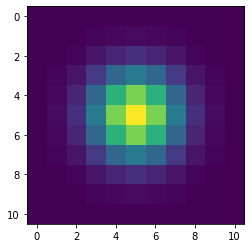

In [72]:
plt.imshow(kernel)

In [73]:
ts_orig = ts_col["TS"].sel(collection="orig").isel(time=0).compute()
td = ts_orig.data

In [79]:
smoothed = convolve(td, kernel)
td.shape

(192, 288)

In [80]:
smoothed.shape

(192, 288)

In [6]:
pdata = precsc.isel(time=0)
ldcpy.compare_stats(pdata, "PRECSC", "orig", "zfp", include_ssim_metric = True)

 
mean orig                          : 1.943e-11
mean zfp                           : 1.9474e-11
mean diff                          : -4.4246e-14
 
variance orig                      : 3.6298e-19
variance zfp                       : 3.6316e-19
 
standard deviation orig            : 6.0249e-10
standard deviation zfp             : 6.0263e-10
 
max value orig                     : 6.0717e-08
max value zfp                      : 6.042e-08
min value orig                     : 0
min value zfp                      : -3.4925e-10
 
max abs diff                       : 6.0959e-10
min abs diff                       : 0
mean abs diff                      : 1.6711e-13
mean squared diff                  : 1.9577e-27
root mean squared diff             : 5.0514e-12
normalized root mean squared diff  : 8.3195e-05
normalized max pointwise error     : 0.005752
pearson correlation coefficient    : 0.99996
ks p-value                         : 0.99999
spatial relative error(% > 0.0001) : 0.33275
max spatial

In [10]:
import numpy as np
ds1 = pdata["PRECSC"].sel(collection="orig")
t1 = np.ravel(ds1)
ds2 = pdata["PRECSC"].sel(collection="zfp")
t2 = np.ravel(ds2)

In [26]:
z = (np.where(abs(t1) == 0))[0]
print(z.size)
if z.size > 0:
                t1_denom = np.copy(t1)
                t1_denom[z] = 1.0
else:
                t1_denom = t1


m_t2 = np.ma.masked_invalid(t2).compressed()
m_t1 = np.ma.masked_invalid(t1).compressed()
if z.size > 0:
        m_t1_denom = np.ma.masked_invalid(t1_denom).compressed()
else:
        m_t1_denom = m_t1

55107


In [30]:
m_tt = m_t1 - m_t2
m_tt_d = m_tt / m_t1_denom

In [31]:
max_spre = np.max(abs(m_tt))

In [32]:
m_tt.max()

3.4924597e-10

In [38]:
m_tt_d.max()

1236303500000.0

In [46]:
a = m_tt_d.argmax()
print(a)

45466


In [47]:
m_tt[a]

2.1827873e-11

In [48]:
m_t1_denom[a]

1.7655756e-23

In [51]:
m_t1[a]

1.7655756e-23

In [52]:
m_t2[a]

-2.1827873e-11

In [54]:
m_tt[a]/m_t1[a]

1236303500000.0

In [37]:
 abs(ds.max() - ds.min()).compute()

<xarray.DataArray 'PRECSC' ()>
array(6.071738e-08, dtype=float32)
Coordinates:
    time        object 2006-01-01 00:00:00
    collection  <U4 'orig'

In [50]:
pop_orig = pop_sst["SST"].sel(collection="orig").isel(time=0).compute()
pop_comp = pop_sst["SST"].sel(collection="zfp").isel(time=0).compute()

pop_dm = ldcpy.metrics.DiffMetrics(pop_orig, pop_comp, aggregate_dims=['nlat', 'nlon'])
pop_ssim = pop_dm.get_diff_metric('ssim')
print(pop_ssim)
pop_ssim_fp = pop_dm.get_diff_metric('ssim_fp')
print(pop_ssim_fp)

0.9999178166419496
0.9976037038347148


In [52]:
ts_orig = ts_col["TS"].sel(collection="orig").isel(time=0).compute()
ts_comp = ts_col["TS"].sel(collection="zfpA1.0").isel(time=0).compute()

ts_dm = ldcpy.metrics.DiffMetrics(ts_orig, ts_comp, aggregate_dims=['lat', 'lon'])
ts_ssim = ts_dm.get_diff_metric('ssim')
print(ts_ssim)
ts_ssim_fp = ts_dm.get_diff_metric('ssim_fp')
print(ts_ssim_fp)

0.9984478072273414
0.9822025209368547


In [28]:
data = ts_col.isel(time=0)
ldcpy.compare_stats(data, "TS", "orig", "zfpA1.0")

orig zfpA1.0
mean                  274.71  274.71
variance              534.01  533.68
standard deviation    23.109  23.102
max value             315.58  315.57
min value             216.74  216.82
probability positive       1       1
number of zeros            0       0

max abs diff                           0.40588
min abs diff                                 0
mean abs diff                          0.05852
mean squared diff                   3.3262e-05
root mean squared diff                0.075273
normalized root mean squared diff   0.00076154
normalized max pointwise error       0.0041064
pearson correlation coefficient        0.99999
ks p-value                                   1
spatial relative error(% > 0.0001)      68.958
max spatial relative error            0.001474

In [25]:
data["TS"].sel(collection = "orig").size


55296

In [49]:
data = t_col.isel(time=0)
ldcpy.compare_stats(data, "T", "orig", "comp")

orig    comp
mean                  239.64   239.6
variance              854.43  853.73
standard deviation    29.231  29.219
max value             306.13  306.12
min value             180.75  180.69
probability positive       1       1
number of zeros            0       0

max abs diff                           0.12497
min abs diff                                 0
mean abs diff                         0.040551
mean squared diff                    0.0016444
root mean squared diff                0.049634
normalized root mean squared diff   0.00039588
normalized max pointwise error      0.00099676
pearson correlation coefficient              1
ks p-value                            0.045936
spatial relative error(% > 0.0001)      68.282
max spatial relative error          0.00048757

# 

In [75]:
ds = cmfmc.isel(time=0)
ds_o = ds["CMFMC"].sel(collection = 'orig').isel(ilev=49)
ds_l = ds["CMFMC"].sel(collection = 'lossy')

In [76]:
print(ds_o.data.compute().min())
print(ds_o.data.compute().max())

0.0
0.000115582094


In [77]:
import numpy as np
np.where(ds_o > 0.0)

(array([74, 75, 76, 76, 77, 78, 78, 78, 79, 80, 80, 84, 84, 84, 84, 85, 85,
        85, 85, 85, 85, 86, 86, 97, 99]),
 array([ 96,  96,  96,  97,  97,  97,  98, 102, 101, 100, 103, 131, 132,
        150, 156, 130, 131, 132, 133, 150, 156, 130, 131, 138, 133]))

In [74]:
ds_o

<xarray.DataArray 'CMFMC' (ilev: 71, lat: 192, lon: 288)>
dask.array<getitem, shape=(71, 192, 288), dtype=float32, chunksize=(71, 192, 288), chunktype=numpy.ndarray>
Coordinates:
  * lat         (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * ilev        (ilev) float64 4.5e-06 7.42e-06 1.223e-05 ... 967.5 985.1 1e+03
  * lon         (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
    time        object 2020-02-01 00:00:00
    collection  <U5 'orig'
Attributes:
    units:         kg/m2/s
    mdims:         2
    cell_methods:  time: mean
    long_name:     Moist convection (deep+shallow) mass flux

In [65]:
my_data = cmfmc["CMFMC"].sel(collection="orig")
ds_metrics_across_time = ldcpy.DatasetMetrics(my_data, ["time"])


In [27]:
my_data_mean_across_time = ds_metrics_across_time.get_metric("mean")
my_data_mean_across_time.load()
# trigger computation
#my_data_mean_across_time.load()

<xarray.DataArray 'CMFMC' (ilev: 71, lat: 192, lon: 288)>
array([[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        ...,
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],

       [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
...
        [1.02119537e-03, 1.03182875e-03, 1.02502954e-03, ...,
         1.04713042e-03, 1.03384389e-03, 1.01687890e-03],
        [1.02720146e-03, 1.04045481e-03, 1.01590513e-03, ...,
         1.03063534e-03, 1.03430124e-03, 1.02538054e-03],
        [8.90695437e-04, 8.85295735e-04, 8.88366863e-04, ...,
         8.85669227e-04, 8.95031324e-04, 8.92481104e-04]],

       [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        ...,
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00]]])
Coordinates:
  * lat         (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * ilev        (ilev) float64 4.5e-06 7.42e-06 1.223e-05 ... 967.5 985.1 1e+03
  * lon         (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
    collection  <U4 'orig'
Attributes:
    units:         kg/m2/s
    mdims:         2
    cell_methods:  time: mean
    long_name:     Moist convection (deep+shallow) mass flux

/Users/abaker/anaconda3/envs/ldcpy_dev/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: divide by zero encountered in log10
  return func(*(_execute_task(a, cache) for a in args))
/Users/abaker/anaconda3/envs/ldcpy_dev/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: divide by zero encountered in log10
  return func(*(_execute_task(a, cache) for a in args))
/Users/abaker/anaconda3/envs/ldcpy_dev/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: divide by zero encountered in log10
  return func(*(_execute_task(a, cache) for a in args))
/Users/abaker/anaconda3/envs/ldcpy_dev/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in log10
  return func(*(_execute_task(a, cache) for a in args))
/Users/abaker/anaconda3/envs/ldcpy_dev/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: divide by zero encountered in log10
  return func(*(_execute_task(a, cache) for a in args))
/Users/abaker/anaconda3/envs/ldcpy_d

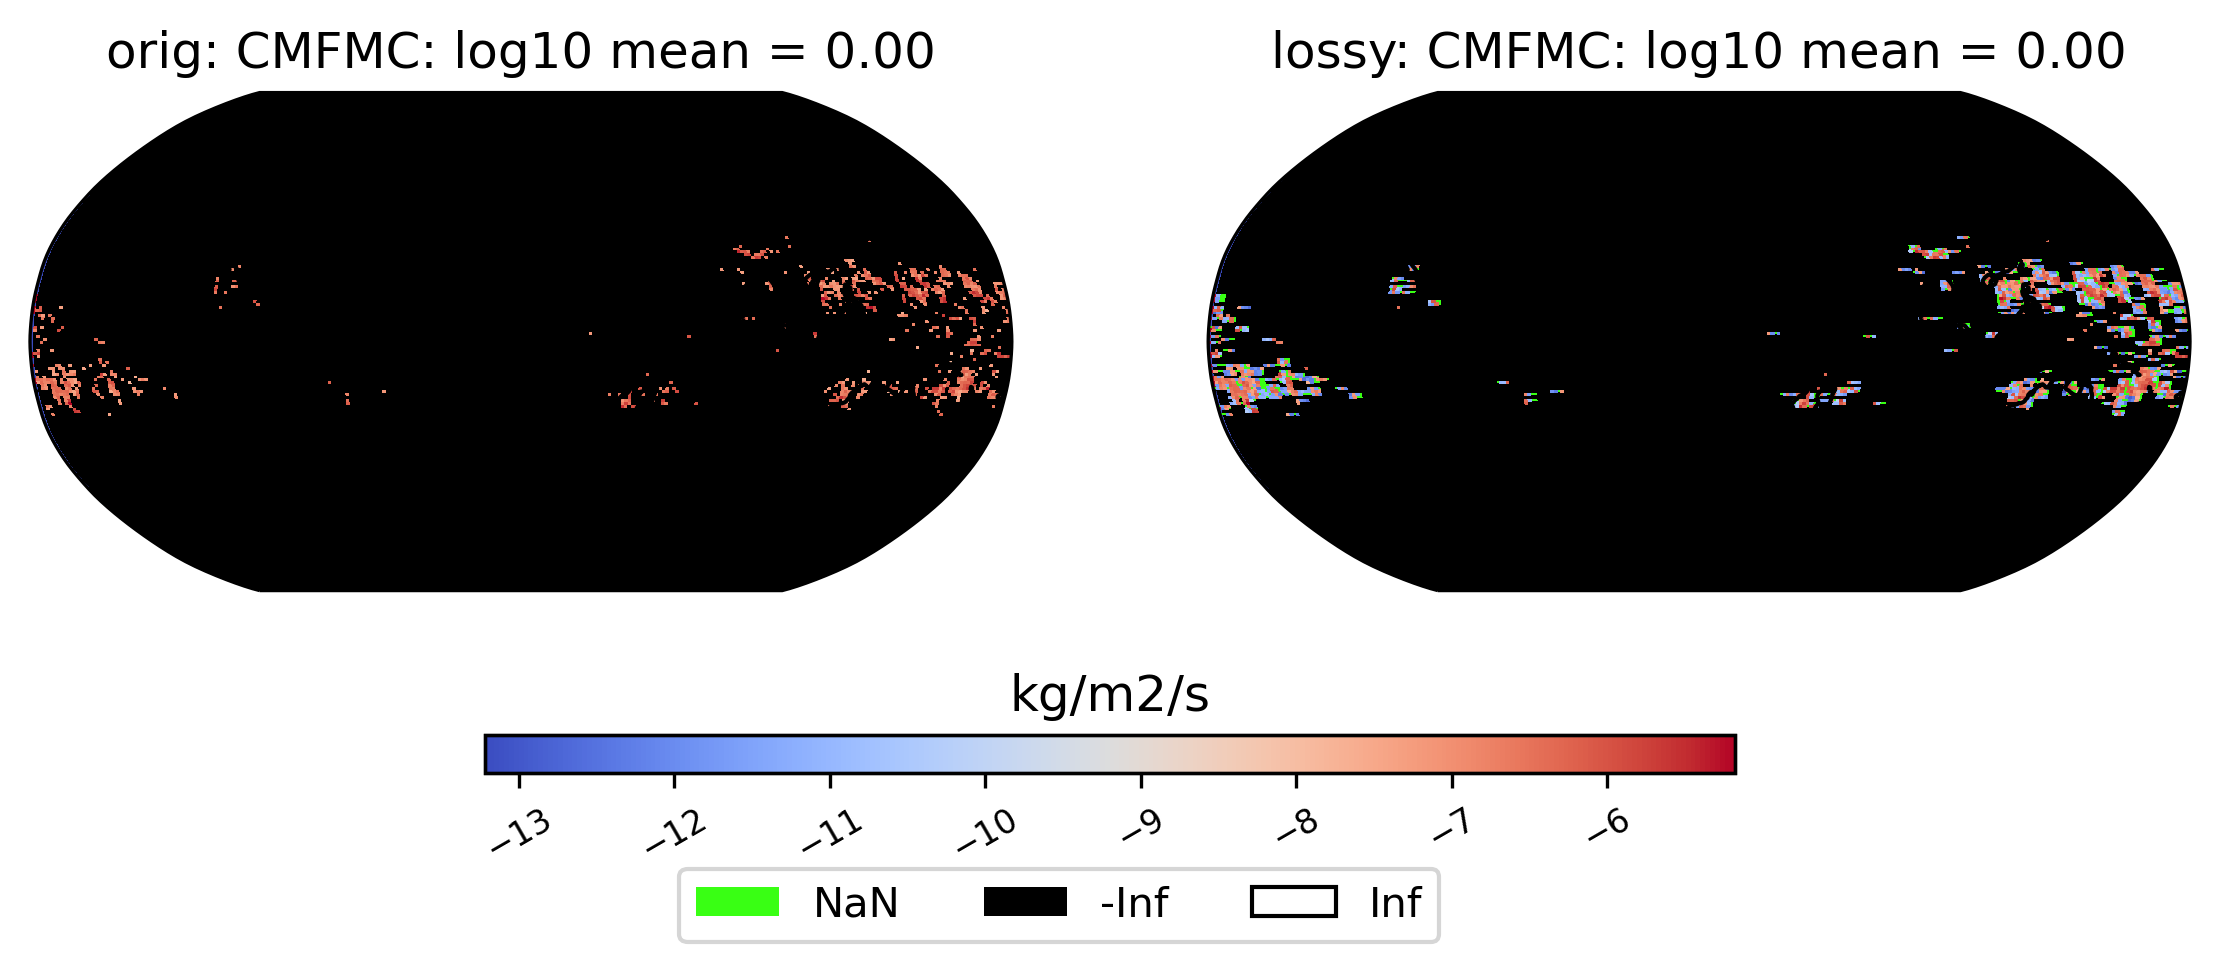

In [87]:
ldcpy.plot(cmfmc, "CMFMC", sets=["orig", "lossy"], calc="mean", plot_type="spatial", lev = 49, transform="log")


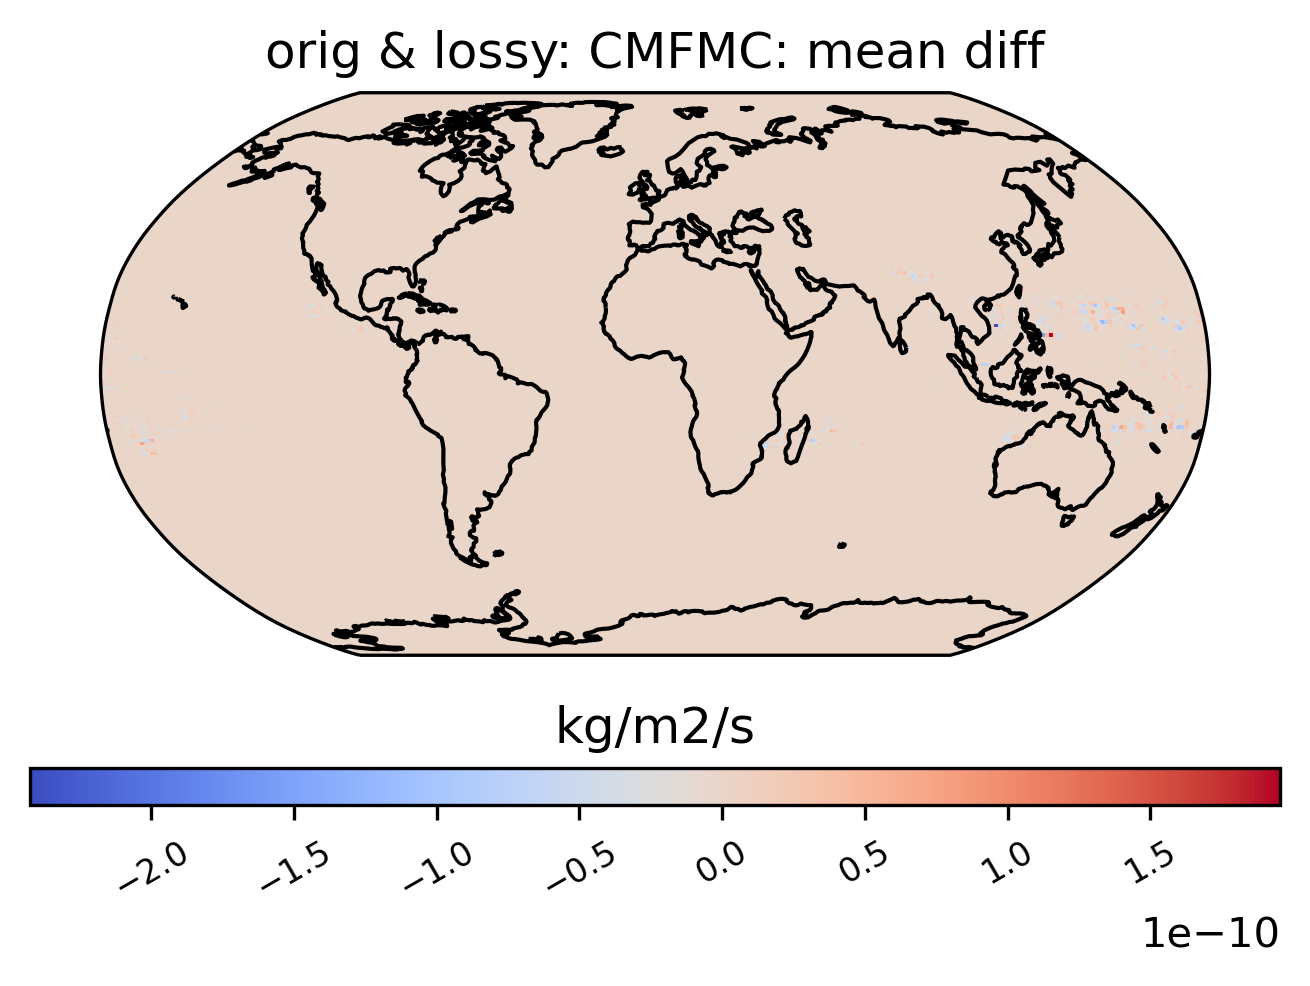

In [84]:
ldcpy.plot(cmfmc, "CMFMC", sets=["orig", "lossy"], calc="mean", plot_type="spatial", calc_type="diff", lev=49)


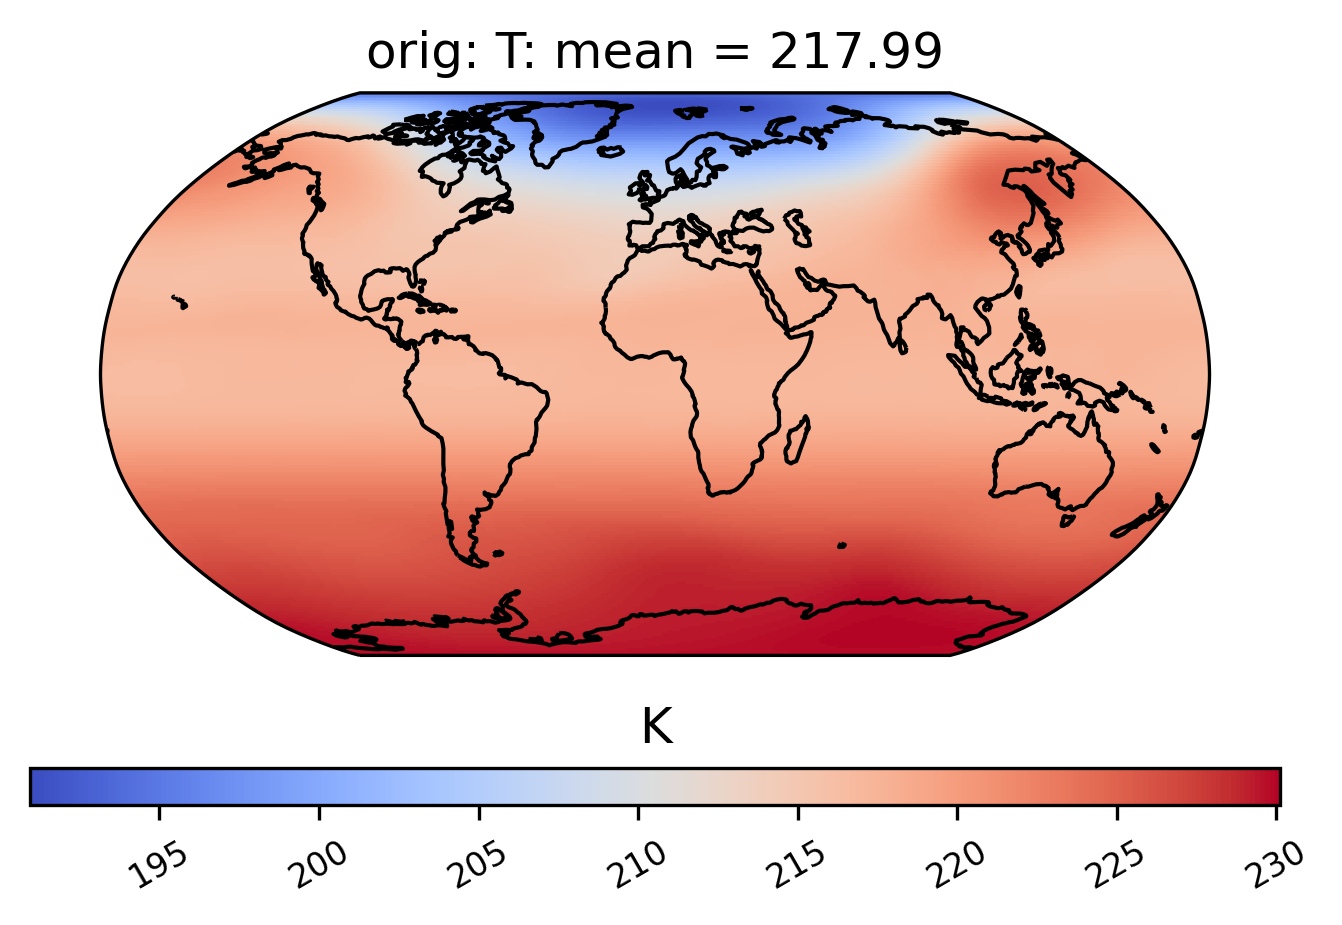

In [81]:
ldcpy.plot(cam_t, "T", sets=["orig"], calc="mean", plot_type="spatial", lev = 3)


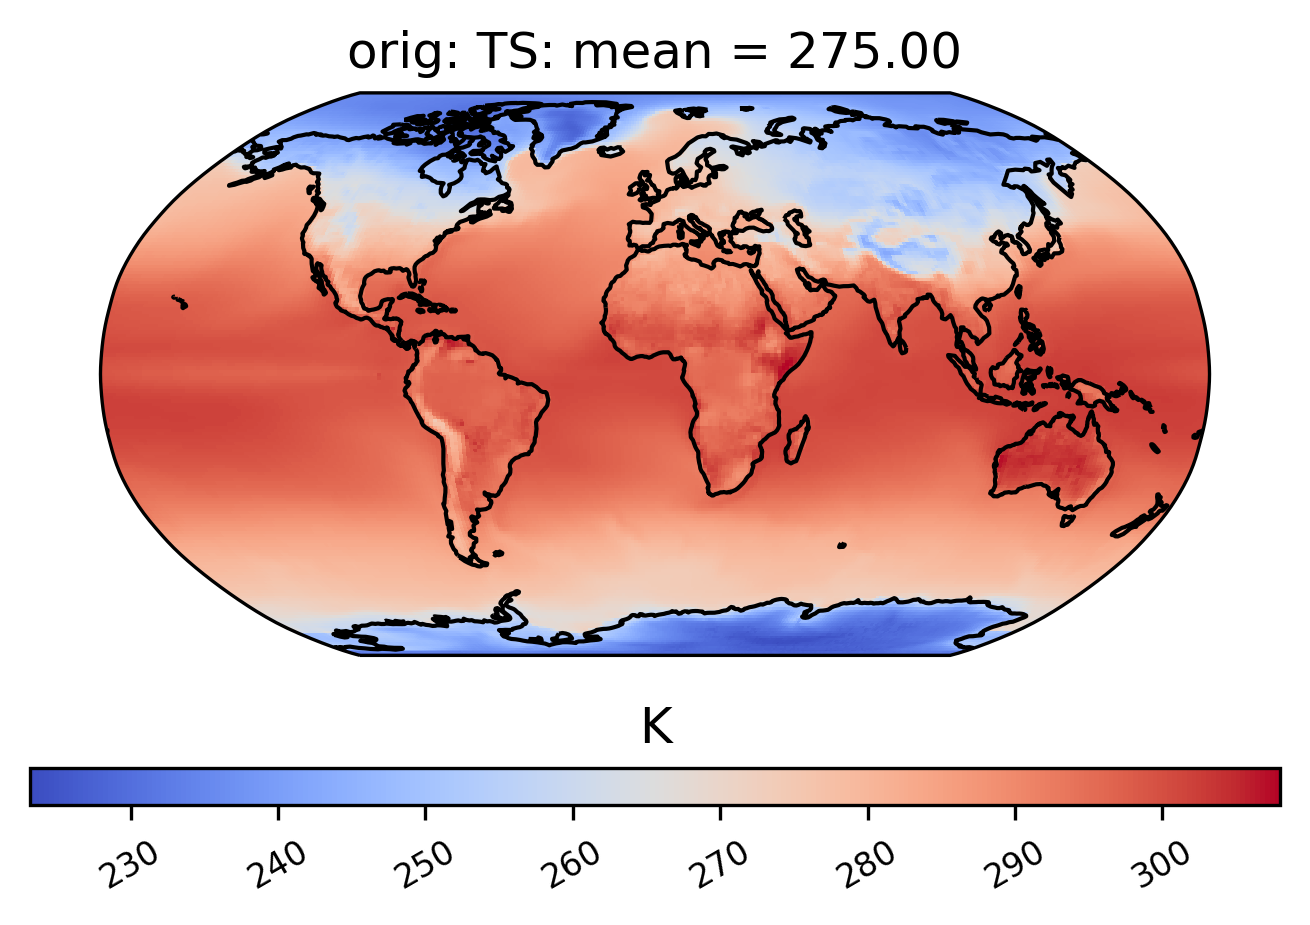

In [23]:
ldcpy.plot(cam_ts, "TS", sets=["orig"], calc="mean", plot_type="spatial")

In [10]:
sst_orig = pop_sst["SST"].sel(collection="orig").isel(time=0).compute()
sst_zfp = pop_sst["SST"].sel(collection="zfp").isel(time=0).compute()

sst_dm = ldcpy.metrics.DiffMetrics(sst_orig, sst_zfp, aggregate_dims=['nlat', 'nlon'])


sst_ssim = sst_dm.get_diff_metric('ssim')
sst_ssim_fp = sst_dm.get_diff_metric('ssim_fp')
sst_ssim_fp_old = sst_dm.get_diff_metric('ssim_fp_old')

In [31]:
print('ssim = ', sst_ssim)
print('ssim_fp = ', sst_ssim_fp)
print('ssim_fp_old = ', sst_ssim_fp_old)

ssim =  0.9999178166419496
ssim_fp =  0.9976037038347148
ssim_fp_old =  nan


In [32]:
tt = cam_t["T"].sel(collection="orig")
tt.dims

('time', 'lev', 'lat', 'lon')

In [4]:
import collections

import cf_xarray as cf
import dask
import numpy as np
import xarray as xr
def pop_add_cyclic(ds):
    
    nj = ds.TLAT.shape[0]
    ni = ds.TLONG.shape[1]

    xL = int(ni/2 - 1)
    xR = int(xL + ni)

    tlon = ds.TLONG.data
    tlat = ds.TLAT.data
    
    tlon = np.where(np.greater_equal(tlon, min(tlon[:,0])), tlon-360., tlon)    
    lon  = np.concatenate((tlon, tlon + 360.), 1)
    lon = lon[:, xL:xR]

    if ni == 320:
        lon[367:-3, 0] = lon[367:-3, 0] + 360.        
    lon = lon - 360.
    
    lon = np.hstack((lon, lon[:, 0:1] + 360.))
    if ni == 320:
        lon[367:, -1] = lon[367:, -1] - 360.

    #-- trick cartopy into doing the right thing:
    #   it gets confused when the cyclic coords are identical
    lon[:, 0] = lon[:, 0] - 1e-8

    #-- periodicity
    lat = np.concatenate((tlat, tlat), 1)
    lat = lat[:, xL:xR]
    lat = np.hstack((lat, lat[:,0:1]))

    TLAT = xr.DataArray(lat, dims=('nlat', 'nlon'))
    TLONG = xr.DataArray(lon, dims=('nlat', 'nlon'))
    
    dso = xr.Dataset({'TLAT': TLAT, 'TLONG': TLONG})

    # copy vars
    varlist = [v for v in ds.data_vars if v not in ['TLAT', 'TLONG']]
    for v in varlist:
        v_dims = ds[v].dims
        if not ('nlat' in v_dims and 'nlon' in v_dims):
            dso[v] = ds[v]
        else:
            # determine and sort other dimensions
            other_dims = set(v_dims) - {'nlat', 'nlon'}
            other_dims = tuple([d for d in v_dims if d in other_dims])
            lon_dim = ds[v].dims.index('nlon')
            field = ds[v].data
            field = np.concatenate((field, field), lon_dim)
            field = field[..., :, xL:xR]
            field = np.concatenate((field, field[..., :, 0:1]), lon_dim)       
            dso[v] = xr.DataArray(field, dims=other_dims+('nlat', 'nlon'), 
                                  attrs=ds[v].attrs)


    # copy coords
    for v, da in ds.coords.items():
        if not ('nlat' in da.dims and 'nlon' in da.dims):
            dso = dso.assign_coords(**{v: da})
                
            
    return dso


In [ ]:
pop_sst

In [41]:
import numpy as np
pop_o = pop_sst.SST.sel(collection='orig').isel(time=0)
pop_o.size
np.count_nonzero(~np.isnan(pop_o))


86212

In [42]:
86212/122880

0.7015950520833333

In [46]:
dp = np.count_nonzero(pop_o > 0)
dp

73966

In [47]:
dp/122880

0.6019368489583333

In [48]:
pdata = pop_sst.isel(time=0)
ldcpy.compare_stats(pdata, "SST", "orig", "zfp")

orig      zfp
mean                   16.593   16.594
variance               117.39   117.39
standard deviation     10.835   10.835
max value              30.528   30.528
min value             -2.1639  -2.1641
probability positive  0.85795  0.85795
number of zeros             0        1

max abs diff                         0.0045254
min abs diff                                 0
mean abs diff                        0.0010493
mean squared diff                   4.9265e-08
root mean squared diff               0.0013037
normalized root mean squared diff   3.9878e-05
normalized max pointwise error      0.00013843
pearson correlation coefficient              1
ks p-value                          0.00013815
spatial relative error(% > 0.0001)      31.902
max spatial relative error              1.7397

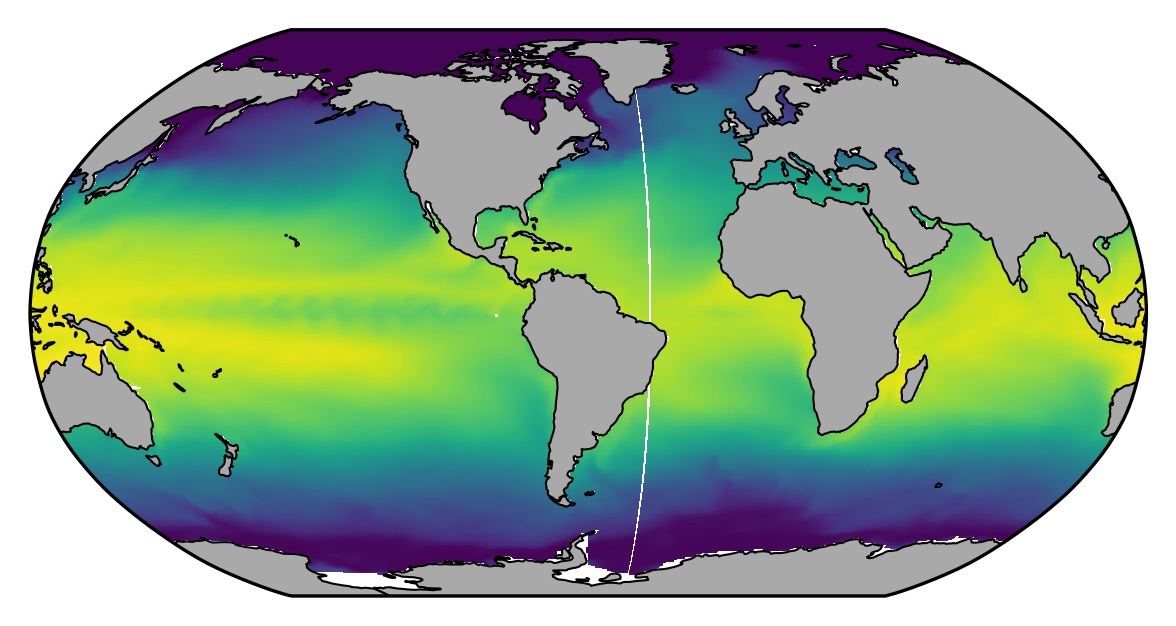

In [7]:
import cartopy
from cartopy import crs as ccrs
from cartopy.util import add_cyclic_point
import matplotlib as mpl
from matplotlib import dates as mdates, pyplot as plt
fig = plt.figure(dpi=300, figsize=(9, 2.5))

ax = plt.subplot(
                  1, 1, 1, projection=ccrs.Robinson(central_longitude=300)
                )
ax.pcolormesh(lon, lat, pop0,
                transform=ccrs.PlateCarree()
            )
ax.set_global() 

land = ax.add_feature(
    cartopy.feature.NaturalEarthFeature('physical', 'land', '110m',
                                        linewidth=0.5,
                                        edgecolor='black',
                                        facecolor='darkgray'))


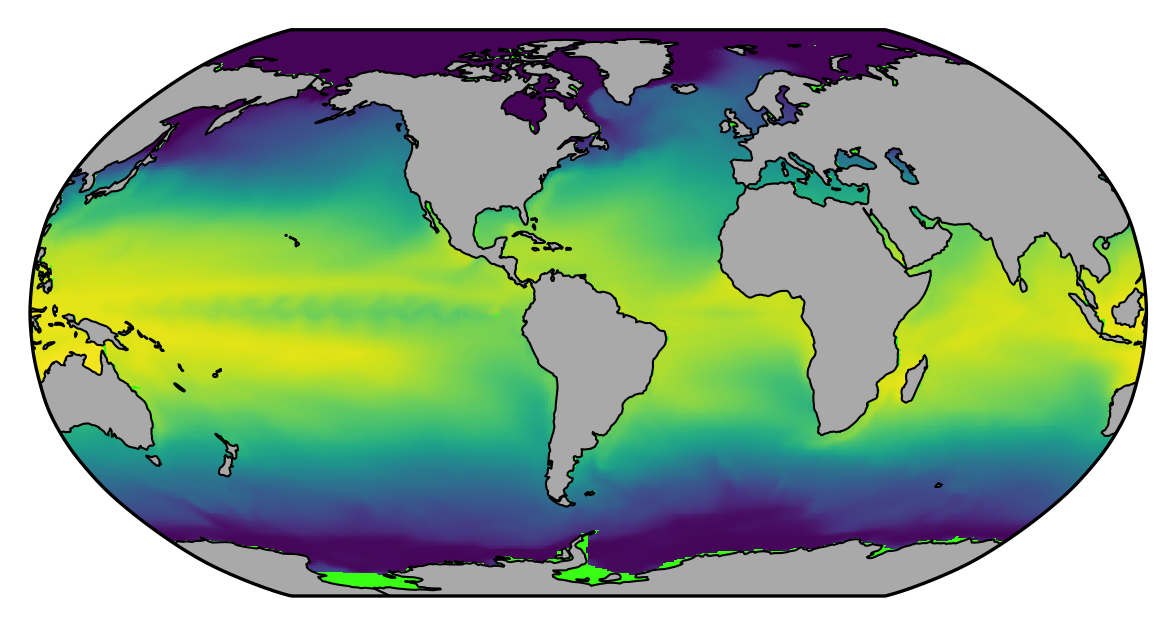

In [13]:
pop_o = pop_sst.SST.sel(collection='orig')
lat = pop_o.cf["latitude"]
lon = pop_o.cf["longitude"]
pop0 = pop_o.isel(time=0)

ylon = lon.data.compute()
#new_londata = np.where(londata > 180.0, londata - 360.0, londata)
ylon_end = ylon[:,0:1]
#print(ylon_end.shape)

xlat = lat.data.compute()
xlat_end = xlat[:,0:1]
#print(xlat_end.shape)


data = pop0.compute()
cdata = add_cyclic_point(data)
cdata.shape

xc_lat = np.hstack((xlat,xlat_end))
yc_lon = np.hstack((ylon,ylon_end))
#print(yc_lon.shape)
#print(xc_lat.shape)

#yc_lon[:, 0] = yc_lon[:, 0] - 1e-8


fig = plt.figure(dpi=300, figsize=(9, 2.5))
ax3 = plt.subplot(
                  1, 1, 1, projection=ccrs.Robinson(central_longitude=300.0)
                )

ax3.set_facecolor('#39ff14')
ax3.pcolormesh(yc_lon, xc_lat, cdata,transform=ccrs.PlateCarree())

ax3.set_global()
land = ax3.add_feature(
    cartopy.feature.NaturalEarthFeature('physical', 'land', '110m',
                                        linewidth=0.5,
                                        edgecolor='black',
                                        facecolor='darkgray'))



In [ ]:
np.isnan(cdata).any()
#no_inf_data_set = np.nan_to_num(cdata, nan = 0.0)
#np.isnan(no_inf_data_set).any()
j = np.argwhere(np.isnan(cdata))

In [ ]:
poppop = pop_sst.sel(collection='orig').compute()
test_ds = pop_add_cyclic(poppop)
test_ds.TLONG[:,319]

In [ ]:
ts_o = cam_ts.TS.sel(collection='orig')
lat = ts_o.cf["latitude"]
ts_o.dims
ts_o.dims[0] == 'time'

In [ ]:
cam_ts

In [ ]:
cam_ts["time"].attrs.pop("bounds")

In [ ]:
if "bounds" in cam_ts["time"].attrs.keys():
    print("True")
    cam_ts["time"].attrs.pop("bounds")

In [ ]:
cam_ts["time"].attrs.keys()


In [57]:
t0 = cam_ts.isel(time=0)
t0.cf["TS"]

<xarray.DataArray 'TS' (collection: 3, lat: 192, lon: 288)>
dask.array<getitem, shape=(3, 192, 288), dtype=float32, chunksize=(1, 192, 288), chunktype=numpy.ndarray>
Coordinates:
  * lat         (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon         (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * collection  (collection) <U8 'orig' 'zfpA1.0' 'zfpA1e-1'
Attributes:
    units:         K
    long_name:     Surface temperature (radiative)
    cell_methods:  time: mean

/Users/abaker/anaconda3/envs/ldcpy_dev/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/Users/abaker/anaconda3/envs/ldcpy_dev/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


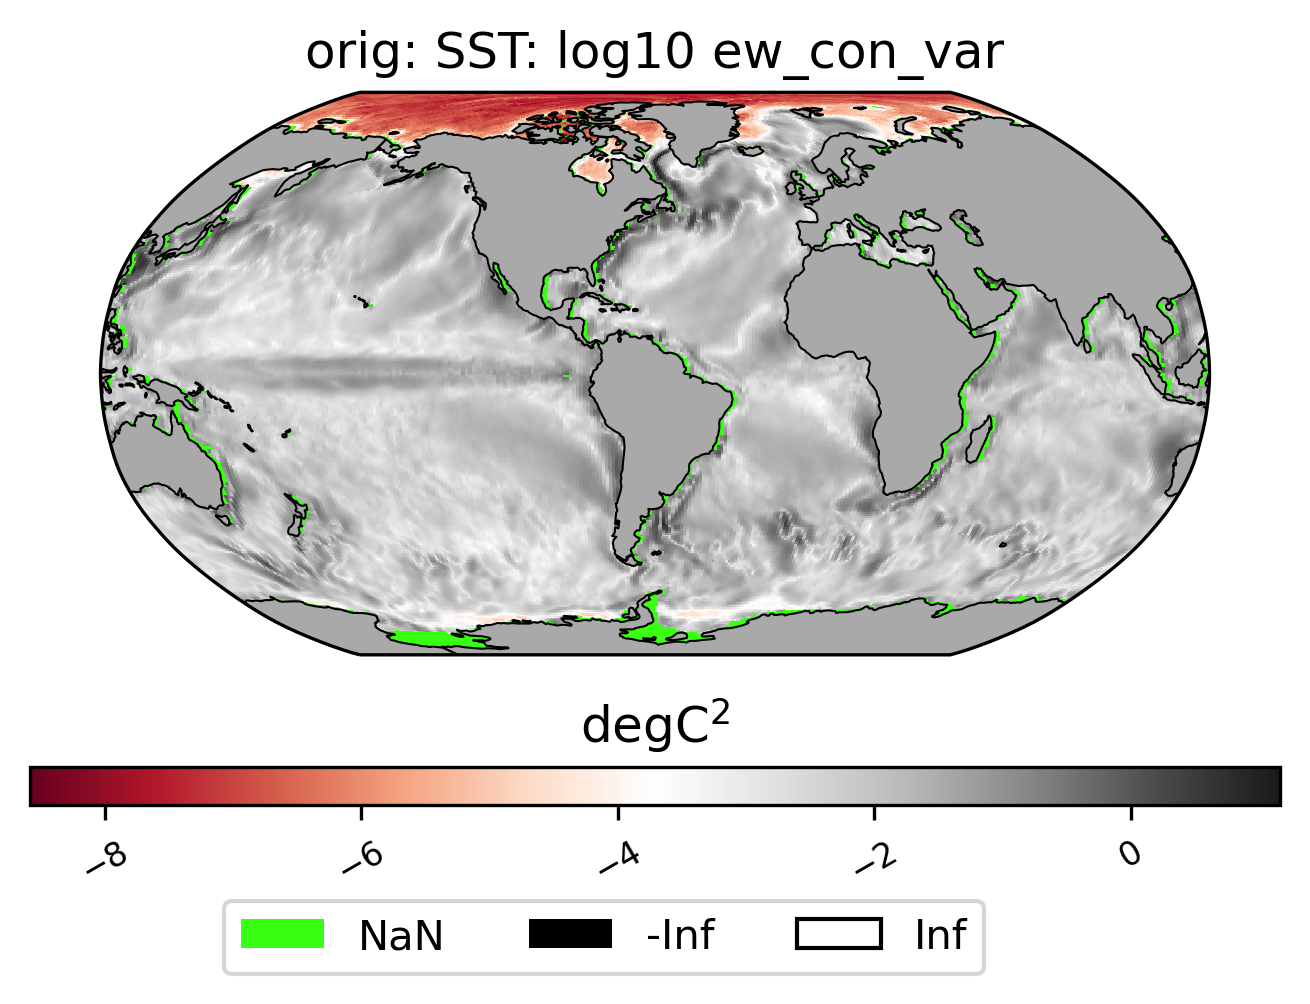

In [151]:
ldcpy.plot(
    pop_sst,
    "SST",
    sets=["orig"],
    calc="ew_con_var",
    color="RdGy",
    calc_type="raw",
    transform = "log"
)

In [69]:
da = pop_sst["SST"]
da1 = da.sel(collection = 'orig').compute()
da1

<xarray.DataArray 'SST' (time: 100, nlat: 384, nlon: 320)>
array([[[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [-0.87323225, -0.6821207 , -0.52603984, ...,         nan,
                 nan,         nan],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [-0.7856389 , -0.5193229 , -0.3053194 , ...,         nan,
                 nan,         nan],
...
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [-1.832865  , -1.8414507 , -1.8296217 , ...,         nan,
                 nan,         nan],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]]], dtype=float32)
Coordinates:
    TLAT        (nlat, nlon) float64 -79.22 -79.22 -79.22 ... 72.2 72.19 72.19
    TLONG       (nlat, nlon) float64 320.6 321.7 322.8 ... 318.9 319.4 319.8
    ULAT        (nlat, nlon) float64 -78.95 -78.95 -78.95 ... 72.42 72.41 72.41
    ULONG       (nlat, nlon) float64 321.1 322.3 323.4 ... 319.2 319.6 320.0
  * time        (time) object 1920-01-03 00:00:00 ... 1920-04-12 00:00:00
    collection  <U4 'orig'
Dimensions without coordinates: nlat, nlon
Attributes:
    long_name:     Surface Potential Temperature
    units:         degC
    grid_loc:      2110
    cell_methods:  time: mean

In [70]:
import xarray as xr
pop_1, pop_2 = xr.align(
                    da1.head({'nlat': lat_length - 1}),
                    da1.tail({'nlat': lat_length - 1}),
                    join='override',
                )

In [87]:
da2 = da1.copy()
da2.diff('nlat', n=1)

<xarray.DataArray 'SST' (time: 100, nlat: 383, nlon: 320)>
array([[[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [-0.26492882, -0.3801161 , -0.39102376, ...,         nan,
                 nan,         nan],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [-0.2622373 , -0.38237888, -0.38164726, ...,         nan,
                 nan,         nan],
...
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [-0.01523507,  0.01643157, -0.01496542, ...,         nan,
                 nan,         nan],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]]], dtype=float32)
Coordinates:
    TLAT        (nlat, nlon) float64 -78.69 -78.69 -78.69 ... 72.2 72.19 72.19
    TLONG       (nlat, nlon) float64 320.6 321.7 322.8 ... 318.9 319.4 319.8
    ULAT        (nlat, nlon) float64 -78.42 -78.42 -78.42 ... 72.42 72.41 72.41
    ULONG       (nlat, nlon) float64 321.1 322.3 323.4 ... 319.2 319.6 320.0
  * time        (time) object 1920-01-03 00:00:00 ... 1920-04-12 00:00:00
    collection  <U4 'orig'
Dimensions without coordinates: nlat, nlon

/Users/abaker/anaconda3/envs/ldcpy_dev/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: divide by zero encountered in log10
  return func(*(_execute_task(a, cache) for a in args))
/Users/abaker/anaconda3/envs/ldcpy_dev/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: divide by zero encountered in log10
  return func(*(_execute_task(a, cache) for a in args))


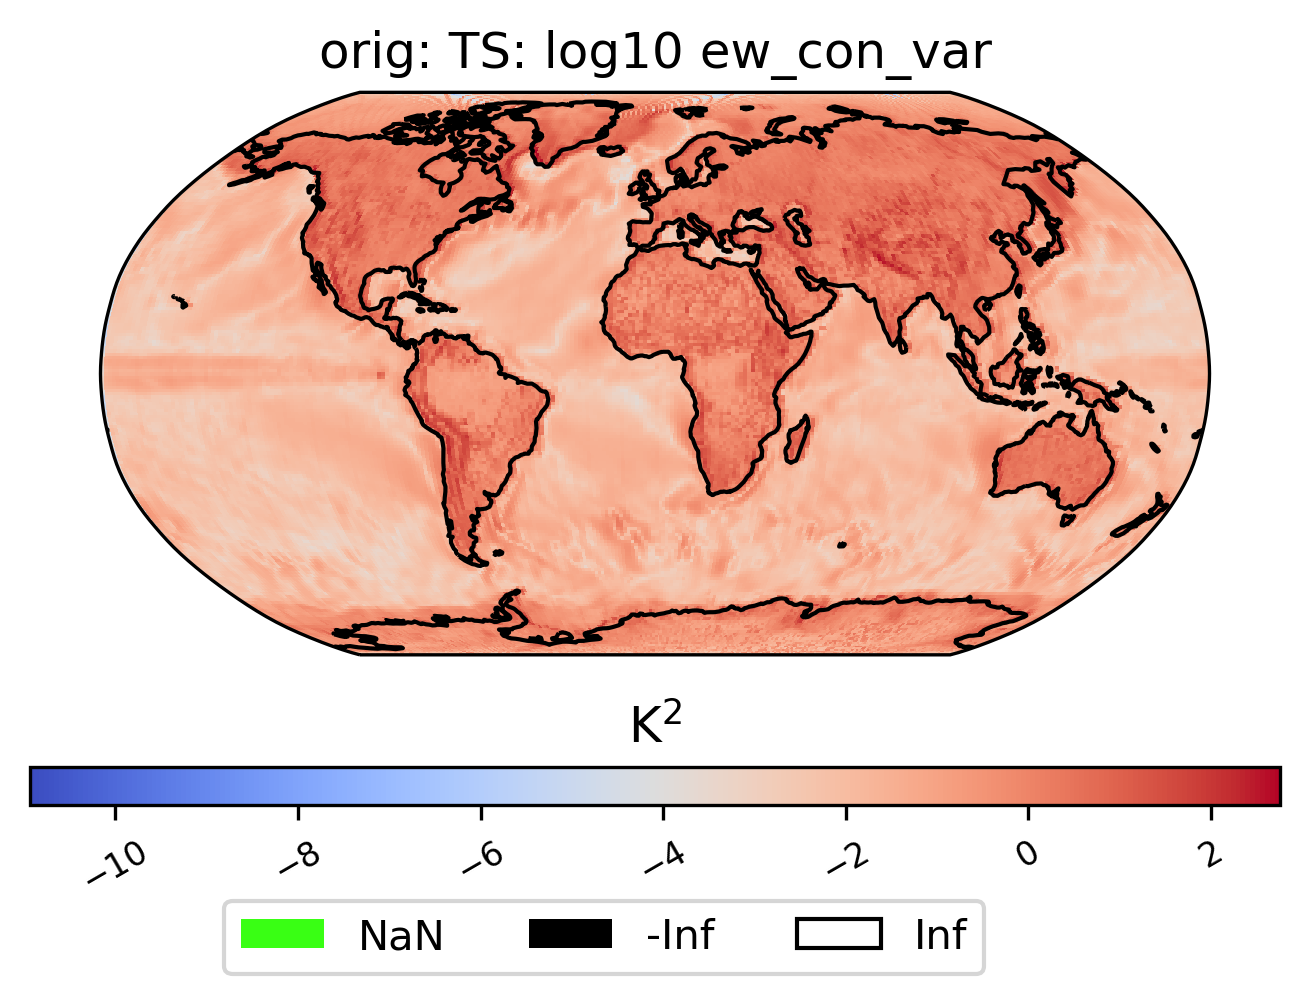

In [154]:
ldcpy.plot(cam_ts, "TS", sets=["orig"], calc="ew_con_var", plot_type="spatial", transform= "log")

/Users/abaker/anaconda3/envs/ldcpy_dev/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: divide by zero encountered in log10
  return func(*(_execute_task(a, cache) for a in args))
/Users/abaker/anaconda3/envs/ldcpy_dev/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: divide by zero encountered in log10
  return func(*(_execute_task(a, cache) for a in args))


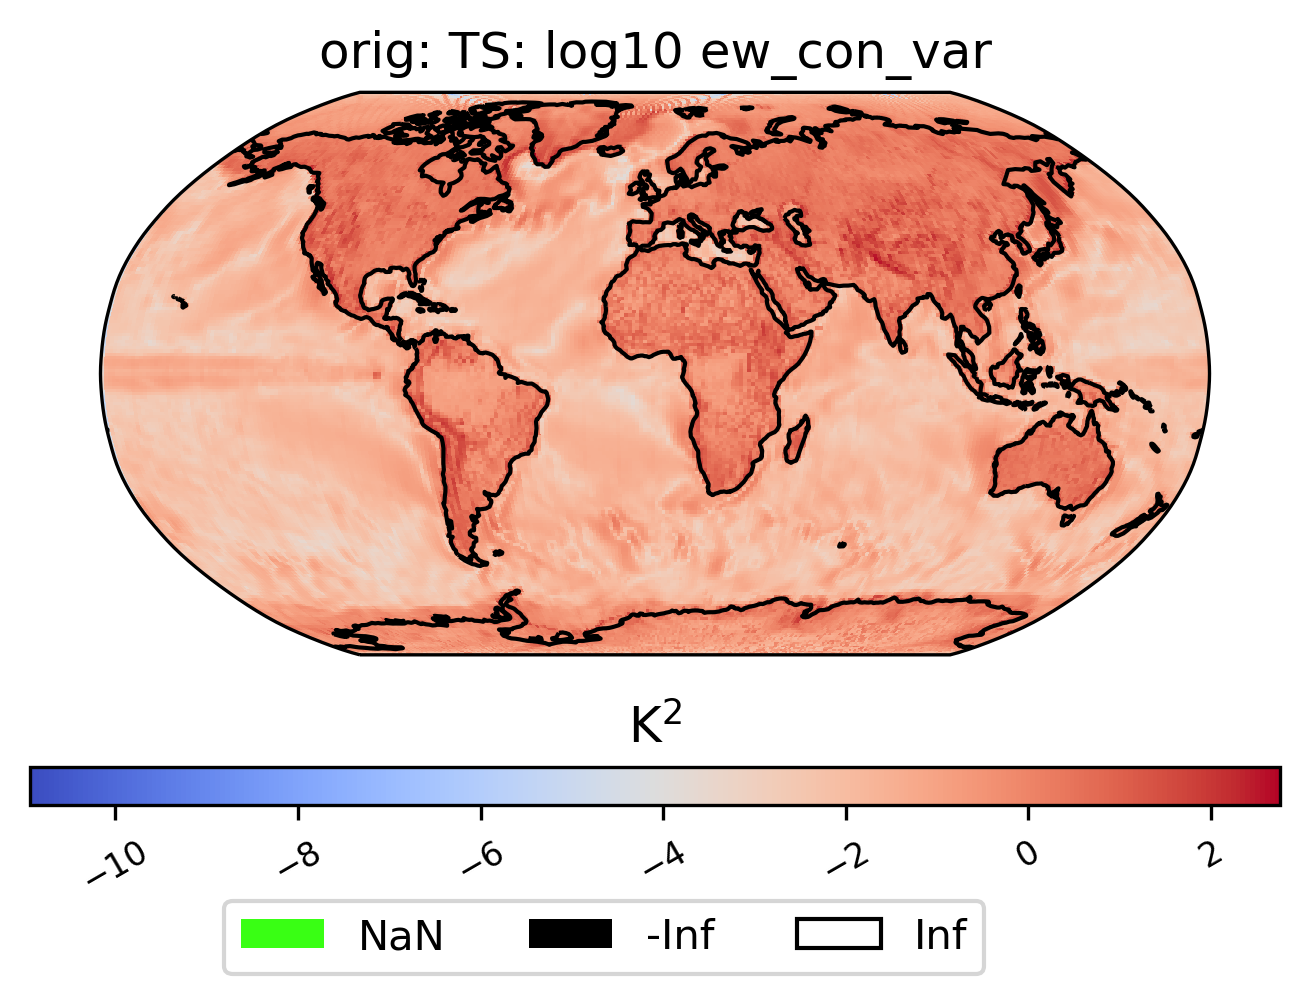

In [153]:
ldcpy.plot(cam_ts, "TS", sets=["orig"], calc="ew_con_var", plot_type="spatial", transform= "log")

In [41]:
dd = cam_ts["TS"]
dataset = dd.sel(collection = 'orig').compute()
lat_length = dataset.sizes['lat']
dataset.shape

(100, 192, 288)

In [35]:
lat_length

192

In [37]:
import xarray as xr
o_1, o_2 = xr.align(
                    dataset.head({'lat': lat_length - 1}),
                    dataset.tail({'lat': lat_length - 1}),
                    join='override',
                )

In [39]:
o_1.shape

(100, 191, 288)

In [ ]:
# pop0 = pop_sst.isel(time=0)
pop_mydata = pop_sst.SST.sel(collection="orig")
pop_mydata_metrics = ldcpy.DatasetMetrics(pop_mydata, ["nlat", "nlon"])
pop_mydata_metrics._lon_dim_name

In [29]:
pop_sst = ldcpy.open_datasets(
    ["SST"],
    ['../../../data/pop/pop.SST.100days.nc', '../../../data/pop/zfp1e-2.pop.SST.100days.nc'],
    ['orig', 'zfp'],
)

dataset size in GB 0.10



In [53]:
tso = pop_sst.SST.sel(collection="orig").isel(time=0)
tsz = pop_sst.SST.sel(collection="zfp").isel(time=0)
tso_d = tso.data.compute()
tsz_d = tsz.data.compute()

In [ ]:
pop0 = pop_sst.isel(time=0)
da = pop0["SST"]
da1 = da.sel(collection = 'orig')
da2 = da.sel(collection = 'zfp')
with xr.set_options(keep_attrs=True):
    dd = da1-da2

In [ ]:
pop0 = pop_sst.isel(time=0)
dac = pop0.cf["SST"]
dac1 = dac.sel(collection = 'orig')
dac2 = dac.sel(collection = 'zfp')
ddc = dac1-dac2

In [89]:
import numpy as np
import pandas as pd
import xarray as xr
mylat = np.array([[1., 2., 3., 4.], [1.1, 2.1, 3.1, 3.9], [1, 1.9, 2.9, 3.9]])
mylon = np.array([[3., 4., 5., 6.], [3.1, 4.1, 5.1, 5.9], [3, 3.9, 4.9, 5.9]])
mytimes = pd.date_range('2000-01-01', periods=5)
pop_data = np.random.uniform(low=0.0, high=100.0, size=(3,4,5))
pop_data = np.arrange(1,20).reshape(3,4,5)

ds_subset = xr.DataArray(
    pop_data, 
     coords={
        "time": mytimes,
        "TLAT": (("nlat", "nlon"), mylat, {'standard_name': 'latitude', 'units': 'degrees_north'}),
        "TLON": (("nlat", "nlon"), mylon, {'standard_name': 'longitude', 'units': 'degrees_east'})
    },
    dims=['nlat', 'nlon', 'time'] , attrs={'long_name': 'Surface Potential'}
)
ds_subset

<xarray.DataArray (nlat: 3, nlon: 4, time: 5)>
array([[[23.87745259, 95.25772838, 10.74445494, 49.65459636,
         49.58771814],
        [54.7698254 , 76.43854924, 89.52221334, 98.85576458,
         40.4874011 ],
        [ 6.66371918, 42.88638881, 11.99054587, 26.98930312,
         34.10877453],
        [60.65553092, 23.05663019, 70.37762305, 28.67807474,
         93.44836966]],

       [[63.29235693, 95.65080596,  8.88821306, 37.04968263,
         28.48676363],
        [ 9.34694592, 57.85482806, 84.86485003, 35.17832609,
         10.00232348],
        [69.75713498, 88.99252296, 13.80745034, 86.10760752,
          2.90284693],
        [36.59062361, 20.42956981, 50.34830093, 85.46948405,
         79.23951071]],

       [[48.88232492, 13.48816173,  4.10216361, 20.127919  ,
         95.28821224],
        [61.90505288, 28.07703364,  8.68247065, 85.67579209,
         87.54405999],
        [11.69426519, 69.08029761, 59.73732378, 49.3959224 ,
         11.99178668],
        [64.70930681, 95.87536212, 53.89143534, 91.33440182,
         48.58116085]]])
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 ... 2000-01-05
    TLAT     (nlat, nlon) float64 1.0 2.0 3.0 4.0 1.1 ... 3.9 1.0 1.9 2.9 3.9
    TLON     (nlat, nlon) float64 3.0 4.0 5.0 6.0 3.1 ... 5.9 3.0 3.9 4.9 5.9
Dimensions without coordinates: nlat, nlon
Attributes:
    long_name:  Surface Potential

In [5]:
import numpy as np
pop_data = np.arange(1,61).reshape(3,4,5)
pop_data


array([[[ 1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10],
        [11, 12, 13, 14, 15],
        [16, 17, 18, 19, 20]],

       [[21, 22, 23, 24, 25],
        [26, 27, 28, 29, 30],
        [31, 32, 33, 34, 35],
        [36, 37, 38, 39, 40]],

       [[41, 42, 43, 44, 45],
        [46, 47, 48, 49, 50],
        [51, 52, 53, 54, 55],
        [56, 57, 58, 59, 60]]])

In [146]:
import xarray as xr
lat_length = 3
lon_length = 4
ds_h =   xr.concat(
                    [
#                    ds_subset.tail({'nlon': lon_length}),
                    ds_subset,
                    ds_subset.head({'nlon': 1}),
                    ], dim='nlon',
                    )
tt = ds_h.diff("nlon", 1)
cv = np.square(tt)

pop1, pop2 = xr.align(
                ds_subset,
                xr.concat(
                    [
                    ds_subset.tail({'nlon': lon_length - 1}),
                    ds_subset.head({'nlon': 1}),
                    ],
                    dim='nlon',
                    ),
                    join='override',
                )
popper = pop1-pop2
con_var = np.square(popper)

In [85]:
dd = ds_subset.cf['latitude'].dims
lat_dim_name = dd[0]
lon_dim_name = dd[1]
xmin = 1
ymin = 0
ds_singlept = ds_subset.isel({lat_dim_name: xmin, lon_dim_name: ymin})
ds_singlept = ds_subset.isel({lat_dim_name: [xmin], lon_dim_name:[ymin]})


ds_singlept

<xarray.DataArray (nlat: 1, nlon: 1, time: 5)>
array([[[95.29862317, 66.49382637, 72.58974087, 57.17487392,
         41.24070106]]])
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 ... 2000-01-05
    TLAT     (nlat, nlon) float64 1.1
    TLON     (nlat, nlon) float64 3.1
Dimensions without coordinates: nlat, nlon
Attributes:
    long_name:  Surface Potential

In [111]:
ds_singlept[0].data[0][0]

95.29862317196974

In [114]:
mlat = ds_subset["TLAT"].compute()
mlon = ds_subset["TLON"].compute()
ad_lat = 3.1
ad_lon = 4
di = np.sqrt(np.square(ad_lon - mlon) + np.square(ad_lat - mlat))
index = np.argmin(di)
#index = np.where(di == np.min(di))


ValueError: dimensions ('nlat', 'nlon') must have the same length as the number of data dimensions, ndim=0

In [117]:
di.shape

(3, 4)

<xarray.DataArray (nlat: 3, nlon: 4)>
array([[2.32594067, 1.1       , 1.00498756, 2.19317122],
       [2.19317122, 1.00498756, 1.1       , 2.06155281],
       [2.32594067, 1.20415946, 0.92195445, 2.06155281]])
Coordinates:
    TLAT     (nlat, nlon) float64 1.0 2.0 3.0 4.0 1.1 ... 3.9 1.0 1.9 2.9 3.9
    TLON     (nlat, nlon) float64 3.0 4.0 5.0 6.0 3.1 ... 5.9 3.0 3.9 4.9 5.9
Dimensions without coordinates: nlat, nlon

In [93]:
index = np.where(di == np.min(di))
index

(array([2]), array([2]))

In [100]:
xmin = index[0][0]
ymin = index[1][0]
print(xmin,ymin)

2 2


In [9]:
import numpy as np
import pandas as pd
import pytest
import xarray as xr

In [10]:
mylat = np.array([[1., 2., 3., 4.], [1.1, 2.1, 3.1, 3.9], [1, 1.9, 2.9, 3.9]])
mylon = np.array([[3., 4., 5., 6.], [3.1, 4.1, 5.1, 5.9], [3, 3.9, 4.9, 5.9]])
mytimes = pd.date_range('2000-01-01', periods=5)

pop_data = np.arange(1,61).reshape(3,4,5)
test_data = xr.DataArray(
    pop_data, 
     coords={
        "time": mytimes,
        "TLAT": (("nlat", "nlon"), mylat, {'standard_name': 'latitude', 'units': 'degrees_north'}),
        "TLON": (("nlat", "nlon"), mylon, {'standard_name': 'longitude', 'units': 'degrees_east'})
    },
    dims=['nlat', 'nlon', 'time'] , attrs={'long_name': 'Surface Potential'}
)

In [13]:
pop_data2 = np.arange(0,60).reshape(3,4,5)
test_data_2 = xr.DataArray(
    pop_data2, 
     coords={
        "time": mytimes,
        "TLAT": (("nlat", "nlon"), mylat, {'standard_name': 'latitude', 'units': 'degrees_north'}),
        "TLON": (("nlat", "nlon"), mylon, {'standard_name': 'longitude', 'units': 'degrees_east'})
    },
    dims=['nlat', 'nlon', 'time'] , attrs={'long_name': 'Surface Potential'}
)

In [14]:
test_overall_metrics = ldcpy.DatasetMetrics(test_data, ['time', 'nlat', 'nlon'])
test_spatial_metrics = ldcpy.DatasetMetrics(test_data, ['time'])
test_time_series_metrics = ldcpy.DatasetMetrics(test_data, ['nlat', 'nlon'])
test_diff_metrics = ldcpy.DiffMetrics(test_data, test_data_2, ['time', 'nlat', 'nlon'])


In [15]:
mylat = np.array([[1., 2., 3., 4.], [1.1, 2.1, 3.1, 3.9], [1, 1.9, 2.9, 3.9]])
mylon = np.array([[3., 4., 5., 6.], [3.1, 4.1, 5.1, 5.9], [3, 3.9, 4.9, 5.9]])
mydata = np.arange(0, 12, dtype='int64').reshape(3, 4)
myzero = np.zeros(12, dtype='int64').reshape(3, 4)

In [17]:
m =  xr.DataArray(
                        mydata,
                        coords={
                        "TLAT": (("nlat", "nlon"), mylat, {'standard_name': 'latitude', 'units': 'degrees_north'}),
                         "TLON": (("nlat", "nlon"), mylon, {'standard_name': 'longitude', 'units': 'degrees_east'})
    },
                        dims=['nlat', 'nlon'],
                    )

In [18]:
samples =[
            {
                'measured': (
                    xr.DataArray(
                        mydata,
                        coords={
                        "TLAT": (("nlat", "nlon"), mylat, {'standard_name': 'latitude', 'units': 'degrees_north'}),
                         "TLON": (("nlat", "nlon"), mylon, {'standard_name': 'longitude', 'units': 'degrees_east'})
    },
                        dims=['nlat', 'nlon'],
                    )
                ),
                'observed': (
                    xr.DataArray(
                        mydata,
                        coords={
                        "TLAT": (("nlat", "nlon"), mylat, {'standard_name': 'latitude', 'units': 'degrees_north'}),
                         "TLON": (("nlat", "nlon"), mylon, {'standard_name': 'longitude', 'units': 'degrees_east'})
    },
                        dims=['nlat', 'nlon'],
                    )
                ),
                'expected_error': (
                    xr.DataArray(
                        myzero,
                       coords={
                        "TLAT": (("nlat", "nlon"), mylat, {'standard_name': 'latitude', 'units': 'degrees_north'}),
                         "TLON": (("nlat", "nlon"), mylon, {'standard_name': 'longitude', 'units': 'degrees_east'})
    },
                        dims=['nlat', 'nlon'],
                    )
                ),
            }
        ]

In [20]:
from ldcpy.metrics import DatasetMetrics, DiffMetrics

DiffMetrics(
            xr.DataArray(samples[0]['observed']),
            xr.DataArray(samples[0]['measured']),
            [],
        )

In [21]:
em = DatasetMetrics(
            xr.DataArray(samples[0]['observed']) - xr.DataArray(samples[0]['measured']),
            [],
        )

In [24]:
 em.mean_error

AttributeError: 'DatasetMetrics' object has no attribute 'mean_error'

In [25]:
test_spatial_metrics._lat_dim_name

'nlat'

In [42]:
test_overall_metrics.get_metric('rms')

<xarray.DataArray ()>
array(35.07373186)
Attributes:
    long_name:  Surface Potential

In [89]:
 test_spatial_metrics.get_metric('odds_positive')

<xarray.DataArray (nlat: 3, nlon: 4)>
array([[inf, inf, inf, inf],
       [inf, inf, inf, inf],
       [inf, inf, inf, inf]])
Coordinates:
    TLAT     (nlat, nlon) float64 1.0 2.0 3.0 4.0 1.1 ... 3.9 1.0 1.9 2.9 3.9
    TLON     (nlat, nlon) float64 3.0 4.0 5.0 6.0 3.1 ... 5.9 3.0 3.9 4.9 5.9
Dimensions without coordinates: nlat, nlon
Attributes:
    long_name:  Surface Potential

In [88]:
np.inf

inf

In [77]:
output = {}
output["bob"] = [.01, .5555]
output["error"] = [.0998, 1]
output["ssim"] = [.5522, .3]

In [78]:
output

{'bob': [0.01, 0.5], 'error': [0.0998, 1], 'ssim': [0.55, 0.3]}

In [87]:
import pandas as pd
t = pd.DataFrame.from_dict(output, orient='index', columns=['A', 'B'])
#pd.DataFrame.from_dict(output, orient='index', columns=['A', 'B'])

In [79]:
data = {'row_1': [3, 2, 1, 0], 'row_2': ['a', 'b', 'c', 'd']}
pd.DataFrame.from_dict(data, orient='index')

0  1  2  3
row_1  3  2  1  0
row_2  a  b  c  d

In [88]:
print(t)

            A    B
bob    0.0100  0.5
error  0.0998  1.0
ssim   0.5500  0.3


In [80]:
pd.DataFrame.from_dict(data, orient='index',
                       columns=['A', 'B', 'C', 'D'])

A  B  C  D
row_1  3  2  1  0
row_2  a  b  c  d

In [164]:
for d in output.values():
    print(d)
    

[0.01, 0.5]
[0.0998, 1]
[0.55, 0.3]


In [180]:
dig = 2
error = [.01212, .1456]
p =["%.2g"% item for item in error]
pp =[f"%.{dig}g"%item for item in error]
print(pp)
print(error)
#f"{value:.{significant_digits}g}"

['0.012', '0.15']
[0.01212, 0.1456]


In [167]:
for d in output.keys(): 
   fo =["%.2g"%item for item in output[d]]
   print(fo)
   output[d] = fo 

['0.01', '0.5']
['0.1', '1']
['0.55', '0.3']


In [178]:
output = {}
output["bob"] = [.01, .5555]
output["error"] = [.0998, 1]
output["ssim"] = [.5522, .3]
for d in output.keys(): 
   fo =["%.2g"%item for item in output[d]]
   print(fo)
   output[d] = fo 


['0.01', '0.56']
['0.1', '1']
['0.55', '0.3']


In [185]:
output = {}
sig = 2
output["bob"] = [.01, .5555]
output["error"] = [.0998, 1]
output["ssim"] = [.5522, .3]
for d in output.keys(): 
#    fo =["%.2g"%item for item in output[d]]
    fo =[f"%.{sig}g"%item for item in output[d]]
    #print(fo)
    output[d] = fo 
print(output)

{'bob': ['0.01', '0.56'], 'error': ['0.1', '1'], 'ssim': ['0.55', '0.3']}


In [142]:
df = pd.DataFrame.from_dict(output, orient='index',
                       columns=[ 'A', 'B'])
display(df)

A    B
bob    0.0100  0.5
error  0.0998  1.0
ssim   0.5500  0.3

In [191]:
pdata = precsc.isel(time=0)
ldcpy.compare_stats(pdata, "PRECSC", "orig", "zfp", significant_digits = 7, include_ssim_metric = True)

orig           zfp
mean                1.942957e-11  1.947381e-11
variance            3.629847e-19  3.631591e-19
standard deviation  3.629847e-19  6.026323e-10
max value           6.071738e-08  6.041955e-08
min value                      0  -3.49246e-10

max abs diff                         6.09587e-10
min abs diff                                   0
mean abs diff                       1.671103e-13
mean squared diff                   1.957672e-27
root mean squared diff              5.051382e-12
normalized root mean squared diff   8.319499e-05
normalized max pointwise error       0.005751993
pearson correlation coefficient        0.9999649
ks p-value                             0.9999872
spatial relative error(% > 0.0001)     0.3327546
max spatial relative error          1.236303e+12
SSIM                                    0.999999
Data SSIM                              0.9969487